In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import pathlib
import pycountry

# list of country_names and codes (Czech Republic manually added to list)
country_names = list(map(lambda country : country.name, pycountry.countries))+["Czech Republic"]
country_codes = list(map(lambda country : country.alpha_2, pycountry.countries))

df = pd.DataFrame()
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z')

# For every csv file in folder 
for csv in pathlib.Path('./Datasets/').glob('*.csv'):
    print("Loading dataset: "+csv.stem)
    temp_df = pd.read_csv(csv,
                          index_col=0, 
                          parse_dates=['Start'],
                          dayfirst=True,
                          date_parser=dateparse)
    cand_countries = [country for country in country_names + country_codes 
                                  if country in csv.stem and not country in ["BZ", "BA"]]
    if len(cand_countries) >= 1: #if at least one country was found
        country_found = pycountry.countries.search_fuzzy(cand_countries[0])[0].name
    else: # no country was found when searched
        country_found = 'None Found!'
    print(f"File {csv.stem} belongs to {country_found}\n")
    temp_df['Dataset'] = csv.stem #set cokumn with the name of the dataset this datum came from
    temp_df['Country'] = country_found #set cokumn with the name of the country this datum came from
    df = pd.concat([df,temp_df]) 
print('Data loading complete!')

# sort values based on Start column (Datetime)
df.sort_values(by=['Start'], ascending=True, inplace=True)

Loading dataset: Austria, APG CA  MBA
File Austria, APG CA  MBA belongs to Austria

Loading dataset: Belgium, Elia BZ  CA  MBA
File Belgium, Elia BZ  CA  MBA belongs to Belgium

Loading dataset: Bulgaria, ESO BZ  CA  MBA
File Bulgaria, ESO BZ  CA  MBA belongs to Bulgaria

Loading dataset: Croatia, HOPS BZ  CA  MBA
File Croatia, HOPS BZ  CA  MBA belongs to Croatia

Loading dataset: Czech Republic, CEPS BZ  CA  MBA
File Czech Republic, CEPS BZ  CA  MBA belongs to Czechia

Loading dataset: DE-LU MBA
File DE-LU MBA belongs to Germany

Loading dataset: DK1 BZ  MBA
File DK1 BZ  MBA belongs to Denmark

Loading dataset: DK2 BZ  MBA
File DK2 BZ  MBA belongs to Denmark

Loading dataset: Estonia, Elering BZ  CA  MBA
File Estonia, Elering BZ  CA  MBA belongs to Estonia

Loading dataset: Finland, Fingrid BZ  CA  MBA
File Finland, Fingrid BZ  CA  MBA belongs to Finland

Loading dataset: France, RTE BZ  CA  MBA
File France, RTE BZ  CA  MBA belongs to France

Loading dataset: Greece, IPTO BZ  CA MBA
F

In [4]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# create columns for datetime parsing + weekday/weekend and if date is holiday 
df['Date'] = df['Start'].dt.date
df['Time'] = df['Start'].dt.time
df['Year'] = df['Start'].dt.year
df['Month'] = df['Start'].dt.month
df['Day'] = df['Start'].dt.day
df['Hour'] = df['Start'].dt.hour
df['Minute'] = df['Start'].dt.minute
# df['Second'] = df['Start'].second
df["Weekday"] = df['Start'].dt.weekday
df["Weekend"] = df['Start'].dt.weekday >= 5
df['Holiday'] = df['Start'].dt.date.astype('datetime64').isin(calendar().holidays())

df.to_csv("df_eda_out.csv")

df.loc[df['Holiday']==True]

Start     Load   Price  \
1081  2015-05-25 00:00:00+00:00   7013.0   19.31   
2160  2015-05-25 00:00:00+00:00   3431.0   34.56   
1081  2015-05-25 00:00:00+00:00   3418.0   19.31   
1081  2015-05-25 00:00:00+00:00   2035.0   41.00   
1078  2015-05-25 00:00:00+00:00   7316.0   19.31   
...                         ...      ...     ...   
60199 2022-02-21 23:00:00+00:00   5312.0  171.93   
60159 2022-02-21 23:00:00+00:00  10712.0   16.93   
60216 2022-02-21 23:00:00+00:00    957.0  171.93   
7803  2022-02-21 23:00:00+00:00  16824.0  987.00   
60084 2022-02-21 23:00:00+00:00   1323.0   19.44   

                              Dataset    Country        Date      Time  Year  \
1081                      SE3 BZ  MBA     Sweden  2015-05-25  00:00:00  2015   
2160            Ireland (SEM) BZ  MBA    Ireland  2015-05-25  00:00:00  2015   
1081                      NO2 BZ  MBA     Norway  2015-05-25  00:00:00  2015   
1081                      IT-South BZ      Italy  2015-05-25  00:00:00  2015   
1078     Finland, Fingrid BZ  CA  MBA    Finland  2015-05-25  00:00:00  2015   
...                               ...        ...         ...       ...   ...   
60199         Greece, IPTO BZ  CA MBA     Greece  2022-02-21  23:00:00  2022   
60159    Finland, Fingrid BZ  CA  MBA    Finland  2022-02-21  23:00:00  2022   
60216                  IT-Sardinia BZ      Italy  2022-02-21  23:00:00  2022   
7803                  Ukraine IPS CTA    Ukraine  2022-02-21  23:00:00  2022   
60084  Lithuania, Litgrid BZ  CA  MBA  Lithuania  2022-02-21  23:00:00  2022   

       Month  Day  Hour  Minute  Weekday  Weekend  Holiday  
1081       5   25     0       0        0    False     True  
2160       5   25     0       0        0    False     True  
1081       5   25     0       0        0    False     True  
1081       5   25     0       0        0    False     True  
1078       5   25     0       0        0    False     True  
...      ...  ...   ...     ...      ...      ...      ...  
60199      2   21    23       0        0    False     True  
60159      2   21    23       0        0    False     True  
60216      2   21    23       0        0    False     True  
7803       2   21    23       0        0    False     True  
60084      2   21    23       0        0    False     True  

[69318 rows x 15 columns]

In [4]:
#  debug cell: check if all countries have been added
print(len(df['Dataset'].unique()))
print(df['Dataset'].unique())

df.tail()

42
['Austria, APG CA  MBA' 'DK2 BZ  MBA' 'Belgium, Elia BZ  CA  MBA'
 'Estonia, Elering BZ  CA  MBA' 'Finland, Fingrid BZ  CA  MBA'
 'France, RTE BZ  CA  MBA' 'Slovenia, ELES BZ  CA  MBA'
 'Greece, IPTO BZ  CA MBA' 'Hungary, MAVIR CA  BZ  MBA'
 'Romania, Transelectrica BZ  CA  MBA' 'Ireland (SEM) BZ  MBA'
 'SE1 BZ  MBA' 'Slovakia, SEPS BZ  CA  MBA' 'IT-Centre-North BZ'
 'IT-Centre-South BZ' 'IT-North BZ' 'IT-Sardinia BZ' 'IT-Sicily BZ'
 'NO5 BZ  MBA' 'SE2 BZ  MBA' 'NO4 BZ  MBA' 'NO3 BZ  MBA' 'NO2 BZ  MBA'
 'SE3 BZ  MBA' 'Spain, REE BZ  CA  MBA' 'NO1 BZ  MBA'
 'Lithuania, Litgrid BZ  CA  MBA' 'Latvia, AST BZ  CA  MBA' 'SE4 BZ  MBA'
 'Switzerland, Swissgrid BZ  CA  MBA' 'Czech Republic, CEPS BZ  CA  MBA'
 'IT-South BZ' 'Netherlands, TenneT NL BZ  CA MBA' 'DK1 BZ  MBA'
 'Portugal, REN BZ  CA  MBA' 'Poland, PSE SA BZ  BZA  CA  MBA'
 'Bulgaria, ESO BZ  CA  MBA' 'Serbia, EMS BZ  CA  MBA'
 'Croatia, HOPS BZ  CA  MBA' 'DE-LU MBA' 'Ukraine IPS CTA'
 'Ukraine BEI CTA']


Start     Load   Price  \
61154 2022-04-01 01:00:00+00:00  10822.0  159.90   
61105 2022-04-01 01:00:00+00:00   1282.0   94.48   
60943 2022-04-01 01:00:00+00:00   3440.0   66.61   
61073 2022-04-01 01:00:00+00:00   9606.0   94.48   
46162 2022-04-01 01:00:00+00:00   3509.0  114.16   

                                 Dataset      Country        Date      Time  \
61154  Netherlands, TenneT NL BZ  CA MBA  Netherlands  2022-04-01  01:00:00   
61105                        SE1 BZ  MBA       Sweden  2022-04-01  01:00:00   
60943                        NO3 BZ  MBA       Norway  2022-04-01  01:00:00   
61073       Finland, Fingrid BZ  CA  MBA      Finland  2022-04-01  01:00:00   
46162            Serbia, EMS BZ  CA  MBA       Serbia  2022-04-01  01:00:00   

       Year  Month  Day  Hour  Minute  Weekday  Weekend  Holiday  
61154  2022      4    1     1       0        4    False    False  
61105  2022      4    1     1       0        4    False    False  
60943  2022      4    1     1       0        4    False    False  
61073  2022      4    1     1       0        4    False    False  
46162  2022      4    1     1       0        4    False    False

In [5]:
# list(df.columns):
print("NaN values in dataframe: "+str(df.isnull().sum().sum()))

NaN values in dataframe: 0


In [6]:
# Basic statistics of dataset
df.describe()

Load         Price          Year         Month           Day  \
count  2.478999e+06  2.478999e+06  2.478999e+06  2.478999e+06  2.478999e+06   
mean   7.530733e+03  7.499279e+01  2.018273e+03  6.520528e+00  1.576414e+01   
std    1.103439e+04  1.975181e+02  2.036484e+00  3.460473e+00  8.792633e+00   
min    0.000000e+00 -5.000000e+02  2.015000e+03  1.000000e+00  1.000000e+00   
25%    2.001500e+03  2.993000e+01  2.017000e+03  3.000000e+00  8.000000e+00   
50%    4.116000e+03  4.292000e+01  2.018000e+03  7.000000e+00  1.600000e+01   
75%    7.663000e+03  6.075000e+01  2.020000e+03  1.000000e+01  2.300000e+01   
max    2.258930e+05  6.101780e+03  2.022000e+03  1.200000e+01  3.100000e+01   

               Hour        Minute       Weekday  
count  2.478999e+06  2.478999e+06  2.478999e+06  
mean   1.150831e+01  1.311554e+00  2.998932e+00  
std    6.918740e+00  6.511961e+00  1.999834e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    6.000000e+00  0.000000e+00  1.000000e+00  
50%    1.200000e+01  0.000000e+00  3.000000e+00  
75%    1.800000e+01  0.000000e+00  5.000000e+00  
max    2.300000e+01  4.500000e+01  6.000000e+00

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478999 entries, 0 to 46162
Data columns (total 15 columns):
 #   Column   Dtype              
---  ------   -----              
 0   Start    datetime64[ns, UTC]
 1   Load     float64            
 2   Price    float64            
 3   Dataset  object             
 4   Country  object             
 5   Date     object             
 6   Time     object             
 7   Year     int64              
 8   Month    int64              
 9   Day      int64              
 10  Hour     int64              
 11  Minute   int64              
 12  Weekday  int64              
 13  Weekend  bool               
 14  Holiday  bool               
dtypes: bool(2), datetime64[ns, UTC](1), float64(2), int64(6), object(4)
memory usage: 269.5+ MB


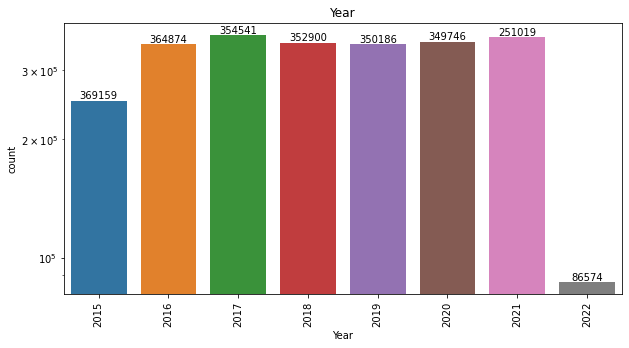

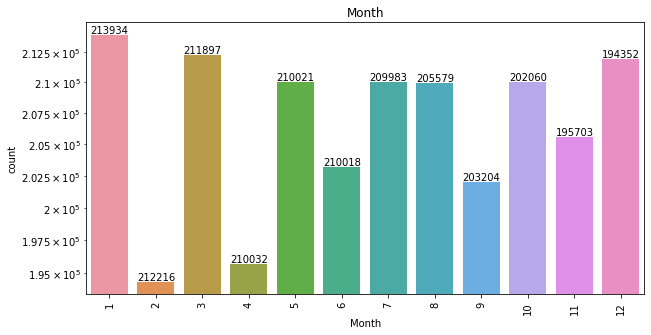

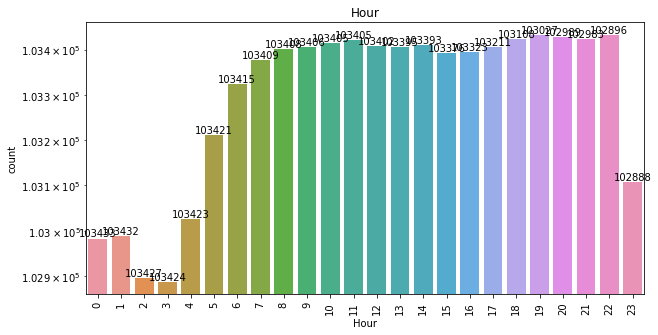

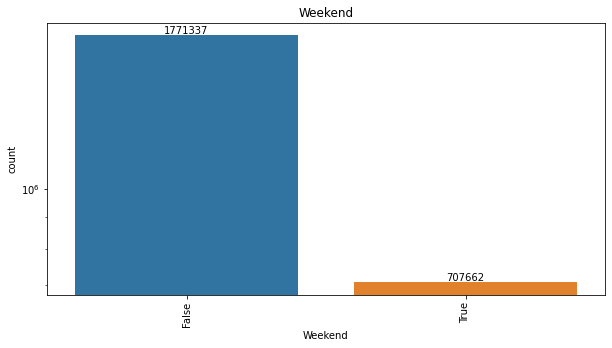

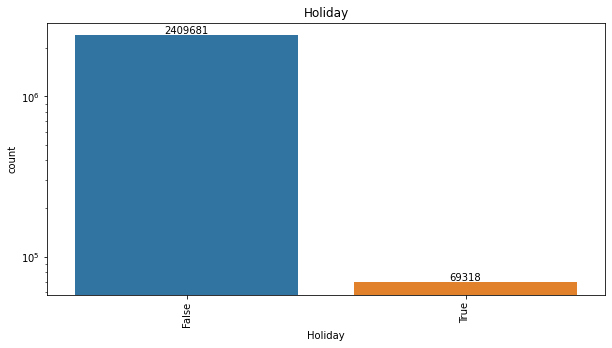

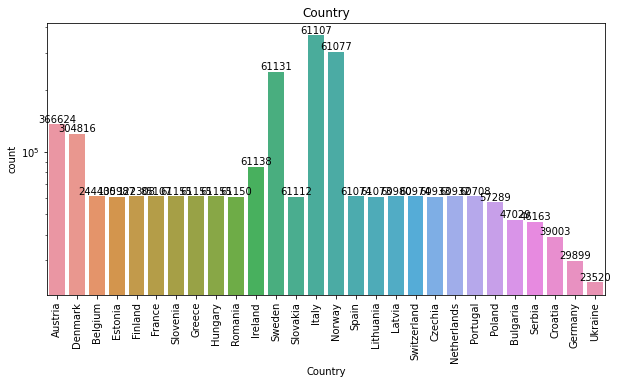

In [33]:
# create a count plot for the columns in for loop
# Countplot: histogram across a categorical (limited possible values), instead of quantitative, variable

for col in ['Year', 'Month', 'Hour','Weekend', 'Holiday','Country']:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax = sns.countplot(x=df[col])
    ax.set_yscale('log')
    abs_values = df[col].value_counts(ascending=False).values
    if(col == 'Dataset'):
        ax.bar_label(ax.containers[0], labels=abs_values,rotation=90)
    else:
        ax.bar_label(ax.containers[0], labels=abs_values)        
    plt.title(col)
    plt.xticks(x=abs_values, rotation=90)
    plt.show()

By creating a few countplots of our data, we make the following deductions:

- Some datasets do not have data for year 2015 and 2022, while most of them do for the years in between
- Months are not homogenously (weird)
- Most datasets have relatively the same amount of data from 7:00 am to 22:00 pm
- Most dates are business days
- Most datasets have the same amount of data exluding a few outliers

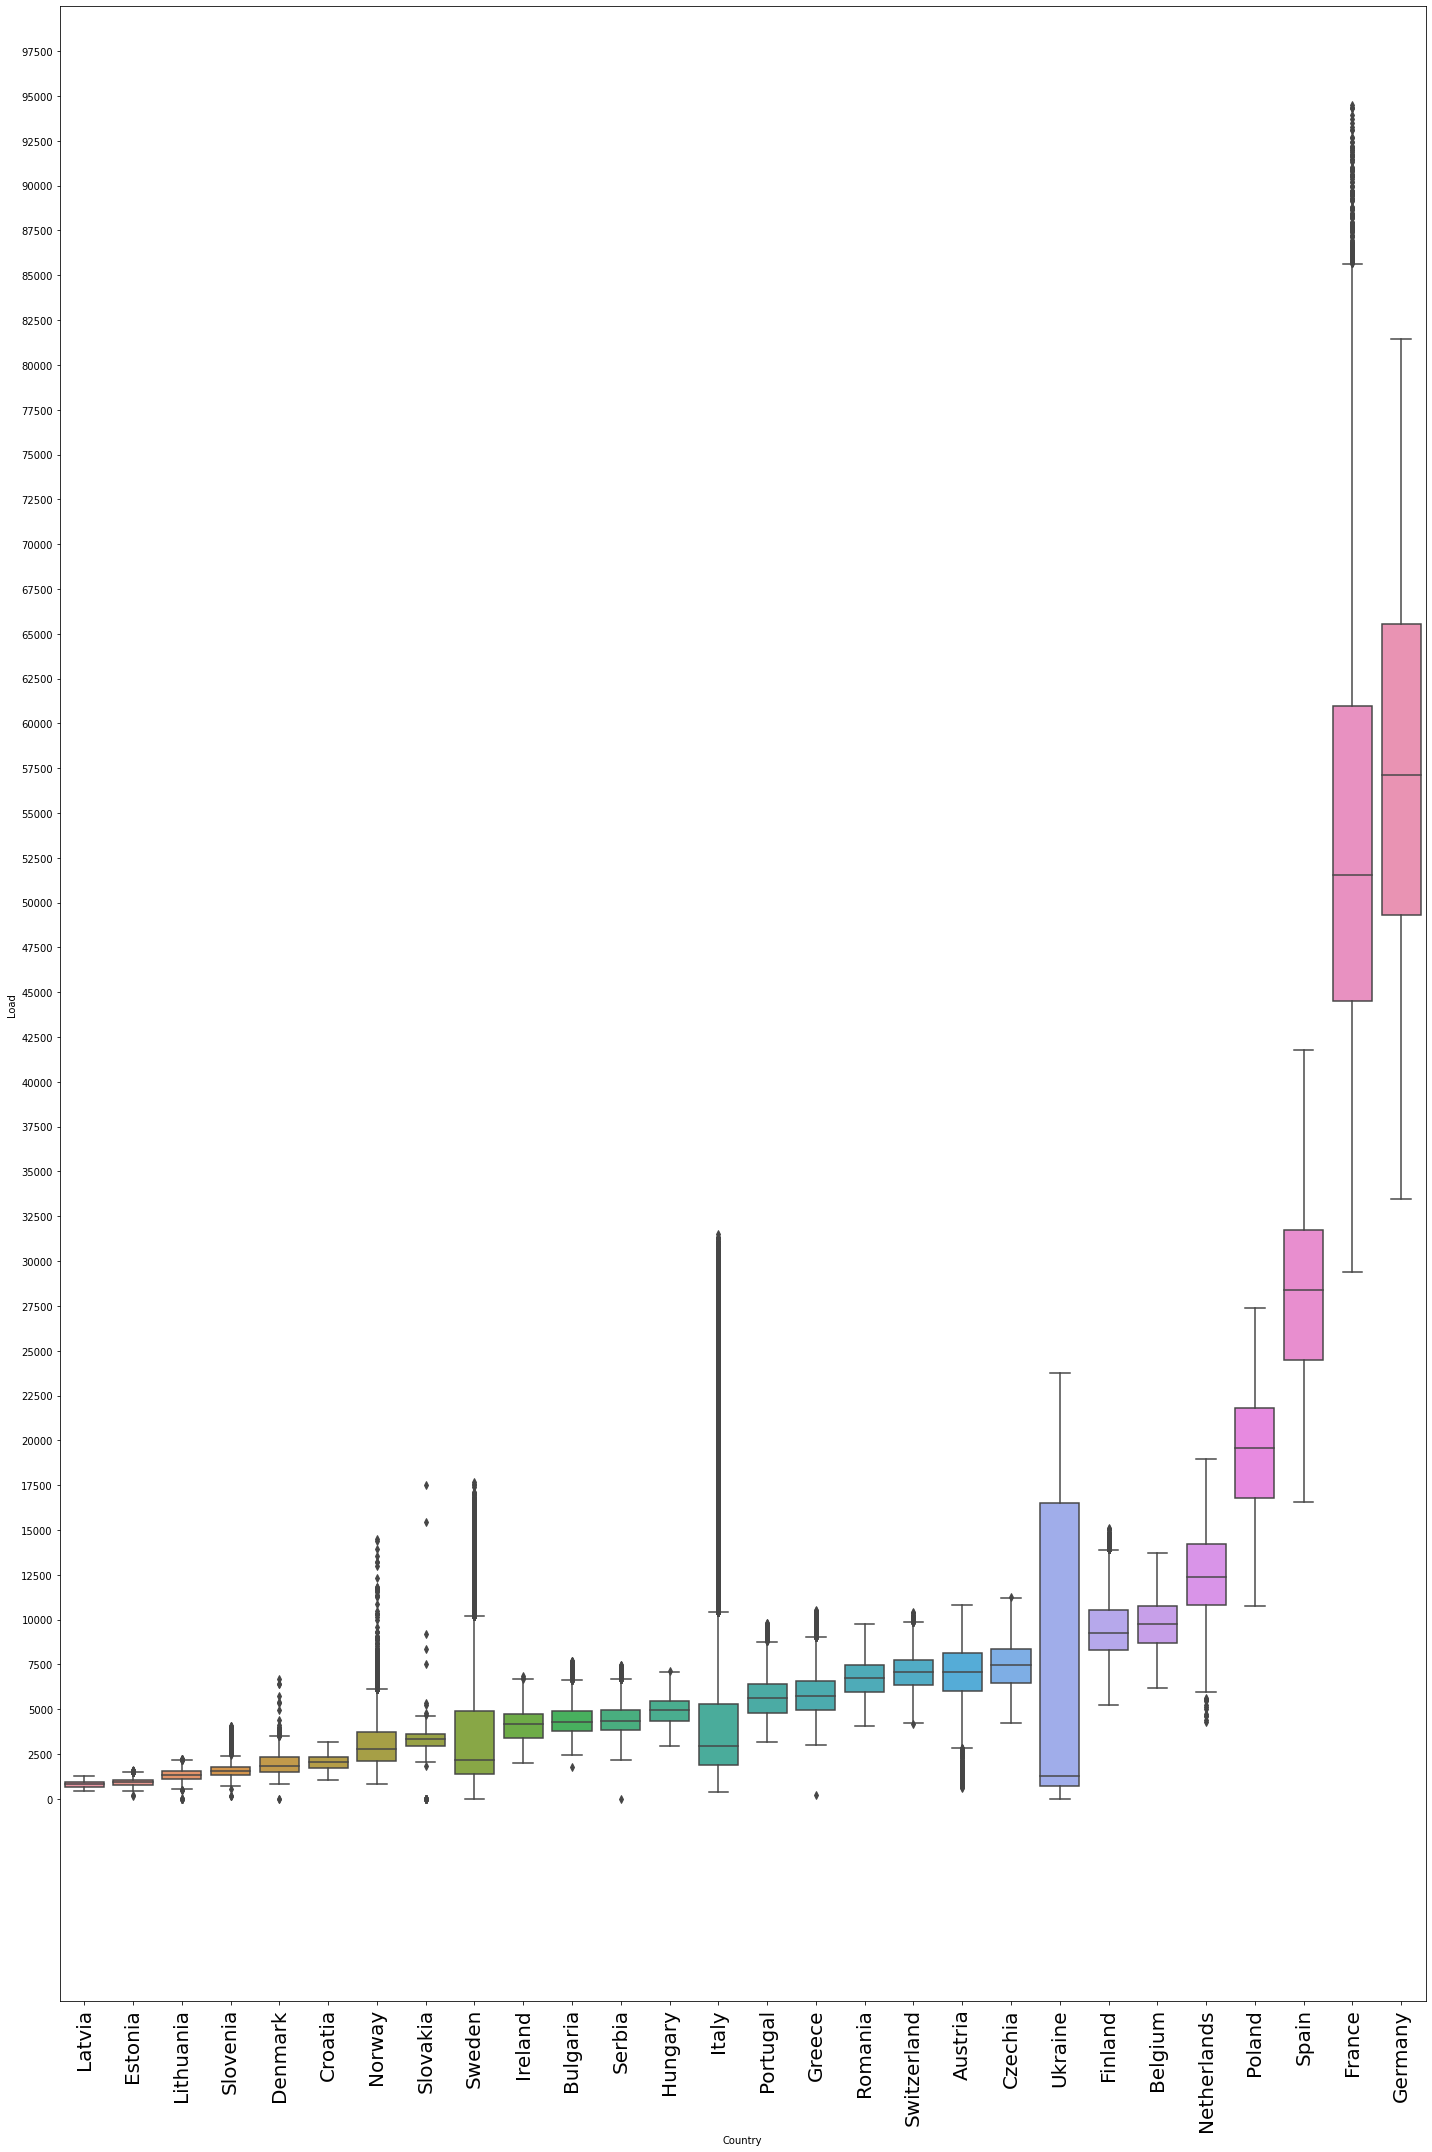

In [7]:
df_scaled = df[['Country', 'Load']].copy()

#group data by country and describe load data column
neighbouring_countries = df_scaled.groupby('Country')['Load'].describe()

# sort above description by mean value and create the list of countries produced by that sorting
neighbouring_countries = neighbouring_countries.sort_values(by=['mean']).index.get_level_values(0).to_list()

# use the country column as index and sort dataset by the list of countries sorted by mean
neighbour_df = df_scaled.set_index('Country').loc[neighbouring_countries]

neighbour_df.reset_index(inplace=True)
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
ax = sns.boxplot(x='Country', y='Load', data=neighbour_df)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(range(0,100000,2500))
plt.ylim(top=100000) 
plt.tight_layout()

In [13]:
# print the values displaye by boxplot in above cell
# set type as int to round numbers and remove decimal in order to take less print space
print( df_scaled.groupby('Country')['Load'].describe().sort_values(by=['mean']).round().astype(int)) 

              count   mean    std    min    25%    50%    75%     max
Country                                                              
Latvia        61077    822    168    436    682    824    951    1300
Estonia       60932    938    200    166    786    927   1073    1591
Lithuania     60974   1345    265      0   1133   1344   1543    2233
Slovenia      61155   1544    292    163   1315   1537   1754    4086
Denmark      122308   1921    572      0   1498   1831   2310    6712
Croatia       39003   2041    388   1067   1715   2080   2337    3156
Norway       304816   3051   1209    829   2116   2764   3722   14485
Slovakia      60980   3310    471      0   2961   3314   3628   17507
Sweden       244400   3903   3693      0   1399   2167   4910   17677
Ireland       85107   4115    833   1994   3399   4193   4718    6835
Bulgaria      47029   4380    879   1803   3786   4262   4928    7690
Serbia        46163   4395    883      0   3830   4342   4966    7491
Hungary       61150 

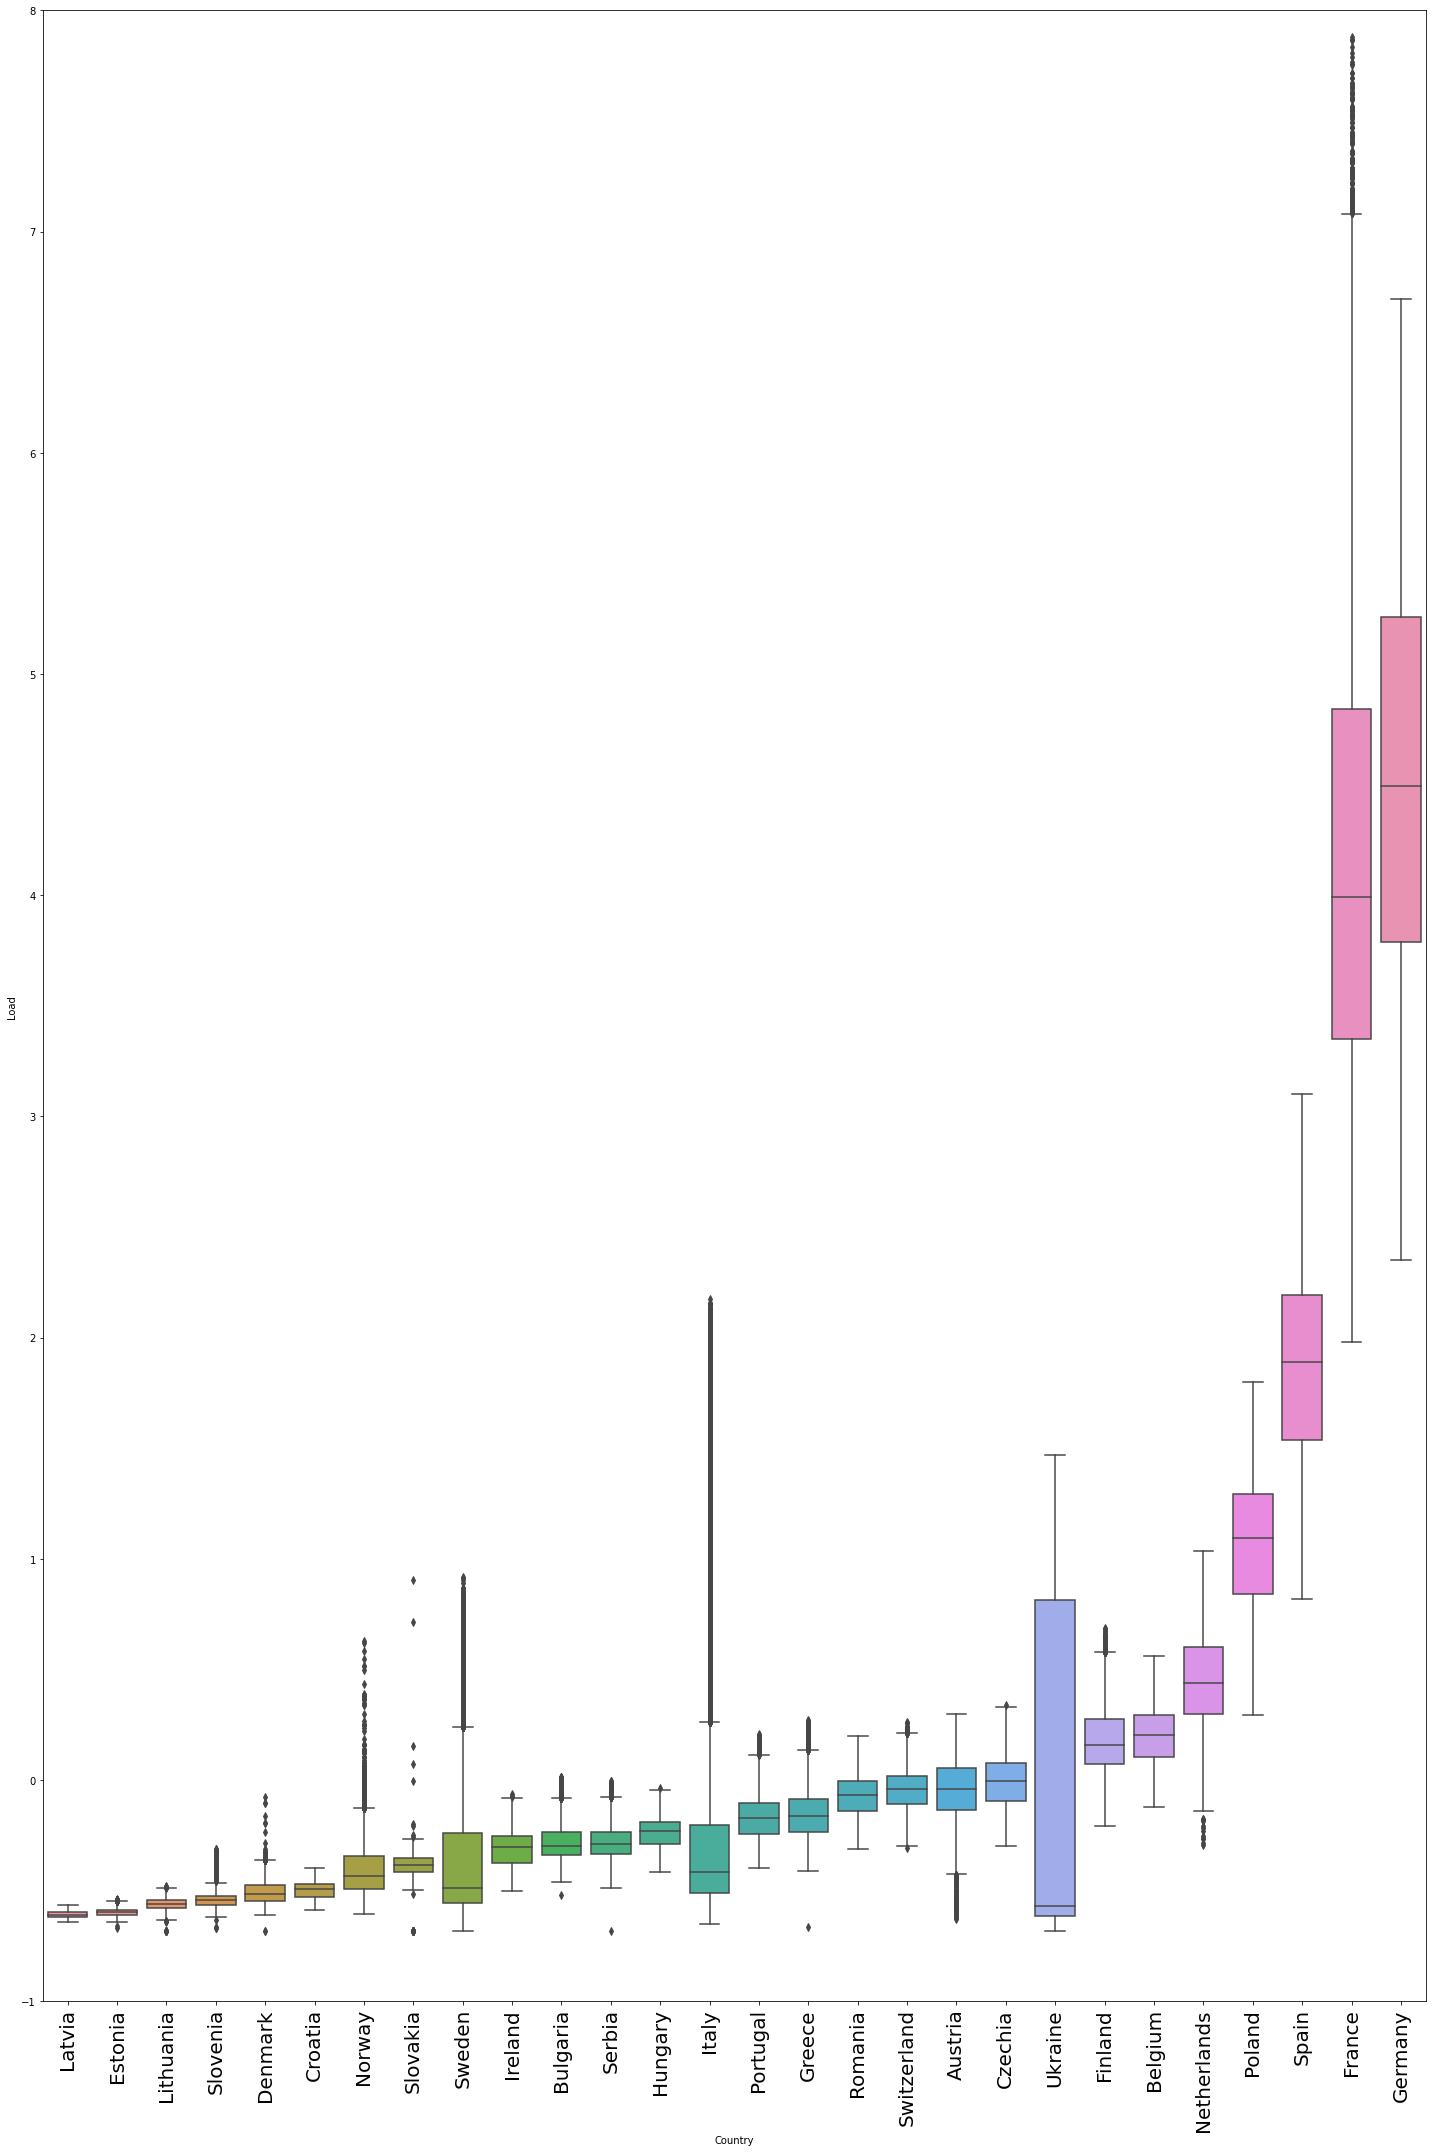

In [41]:
# Rescale Load column to 'force' boxplots to come closer together

from sklearn.preprocessing import StandardScaler

df_scaled = df[['Country', 'Load']].copy()

scaler = StandardScaler()
df_scaled['Load'] = scaler.fit_transform(df['Load'].values.reshape(-1,1))

neighbouring_countries = df_scaled.groupby('Country')['Load'].describe()
neighbouring_countries = neighbouring_countries.sort_values(by=['mean']).index.get_level_values(0).to_list()
neighbour_df = df_scaled.set_index('Country').loc[neighbouring_countries]

neighbour_df.reset_index(inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
plt.ylim(-1, 5)
ax = sns.boxplot(x='Country', y='Load', data=neighbour_df)
plt.xticks(fontsize=20, rotation=90)

plt.ylim(top=8) #set to different values to zoom in/out 

plt.tight_layout()

We can conclude that the amount of energy demand is determined by a country's:
- Population
- maintenance and productivity

From that box plot we can see visually which datasets have similar values and their variance, which will be used to determine which ones are going to be grouped together (source) to forecast values of a target with similar values
Also, we can easily group countries with similar distribution of energy demand
By sorting them in increasing order:
- Latvia - Estonia
- Lithuania - Slovenia
- Denmark - Croatia
- Ireland - Bulgaria - Serbia (- Hungary)
- Portugal - Greece
- Romania - Switcherland - Austria - Czech Republic
- Finland - Belgium
- (France - Germany)?

Text(0.5, 1.0, 'zoom')

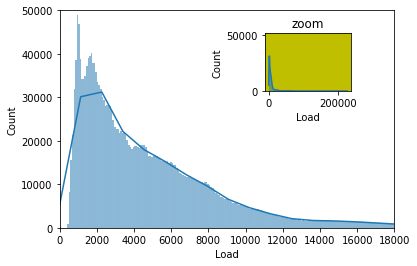

In [59]:
fig, ax = plt.subplots()
sns.histplot(data=df['Load'], kde=True)
plt.xlim(0, 18000)
plt.ylim(0, 50000)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='y')
sns.histplot(data=df['Load'], kde=True, ax=ax2)
ax2.set_title('zoom')
# ax2.set_xlim(right=50000)

In [12]:
df['Load'].autocorr(lag=365*48)

0.004179516499018308

(0.0, 10000.0)

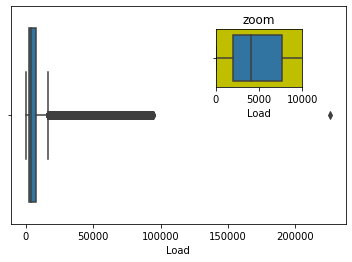

In [13]:
fig, ax = plt.subplots()
ax = sns.boxplot(x=df['Load'])
ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='y')
sns.boxplot(x=df['Load'], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0,10000])

Judging from the box plot, we can see a lot of outlier values ranging from 2000 to 10.000

That is a good indicator that most large loads are actually diviation from the usual load distribution
(spikes in power consumtion)

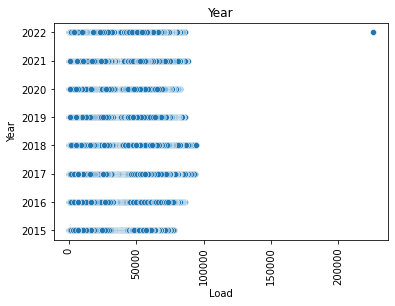

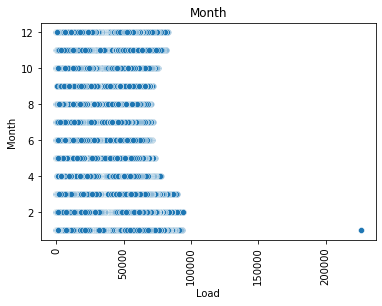

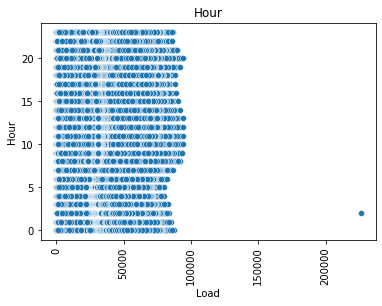

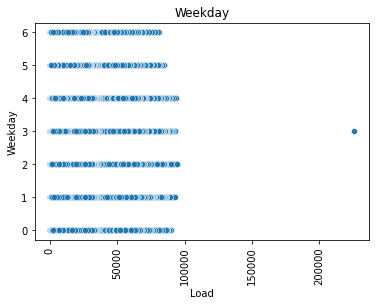

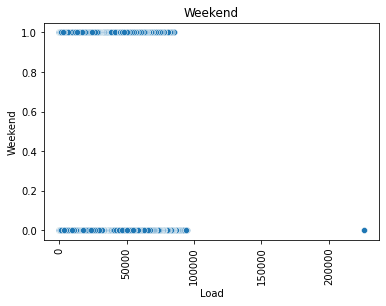

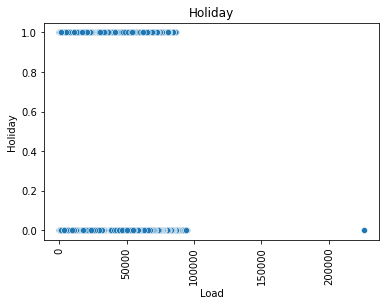

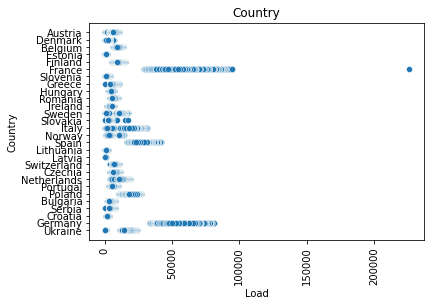

In [14]:
for col in ['Year', 'Month', 'Hour', 'Weekday', 'Weekend', 'Holiday', 'Country']:
    sns.scatterplot(x=df['Load'], y=df[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

From scatterplots not much further can be deduced

<AxesSubplot:xlabel='Holiday'>

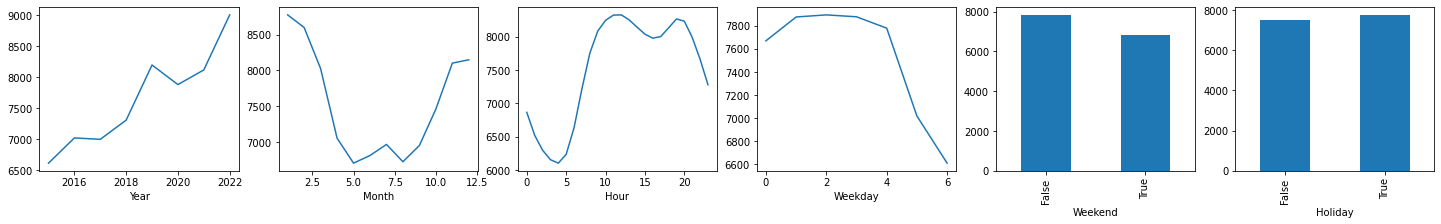

In [15]:
fig, axes = plt.subplots(1, 6)
df.groupby('Year')['Load'].mean().plot(ax=axes[0], figsize=(25, 3))
df.groupby('Month')['Load'].mean().plot(ax=axes[1], figsize=(25, 3))
df.groupby('Hour')['Load'].mean().plot(ax=axes[2], figsize=(25, 4))
df.groupby('Weekday')['Load'].mean().plot(ax=axes[3], figsize=(25, 3))
df.groupby('Weekend')['Load'].mean().plot.bar(ax=axes[4], figsize=(25, 3))
df.groupby('Holiday')['Load'].mean().plot.bar(ax=axes[5], figsize=(25, 3))

We group load based based on a specific variable (x-axis) and plot the mean value

From those graphs we can deduce:
- A upward trend (as year increases, load increases)
- An increase in load demand from September till December and a steady dicrease from January till May (winter months)
- An increase in load demand on business hours (with a slight drop at noon) and proper drop as night approaches
- Load is greater at business days (with significant difference between weekends and not that variant of holidays)

In [16]:
# from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
# from darts.metrics import mape, mase
# from darts import TimeSeries

# df['Start'] = pd.to_datetime(df['Start']).dt.tz_localize(None)
# series = TimeSeries.from_dataframe(df, time_col='Start', 
#                                    value_cols='Load', 
#                                    fill_missing_dates=True, freq='15T')
# series

Loading dataset: Austria, APG CA  MBA


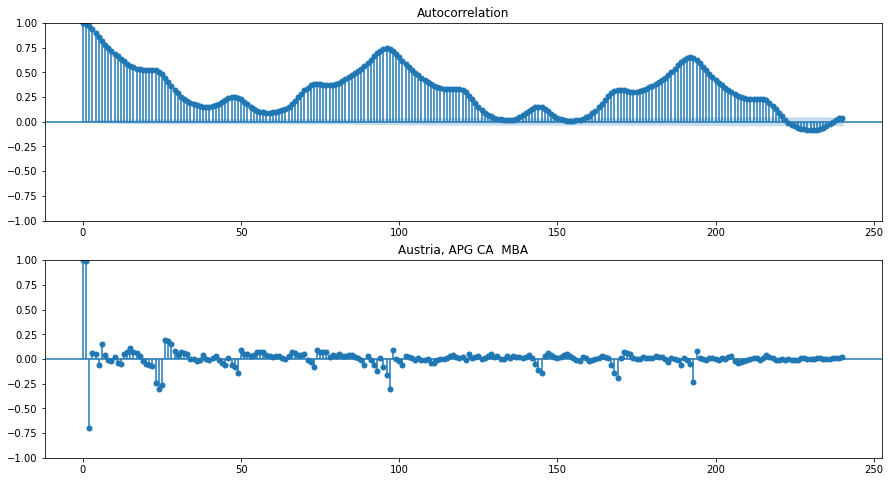

Loading dataset: Belgium, Elia BZ  CA  MBA


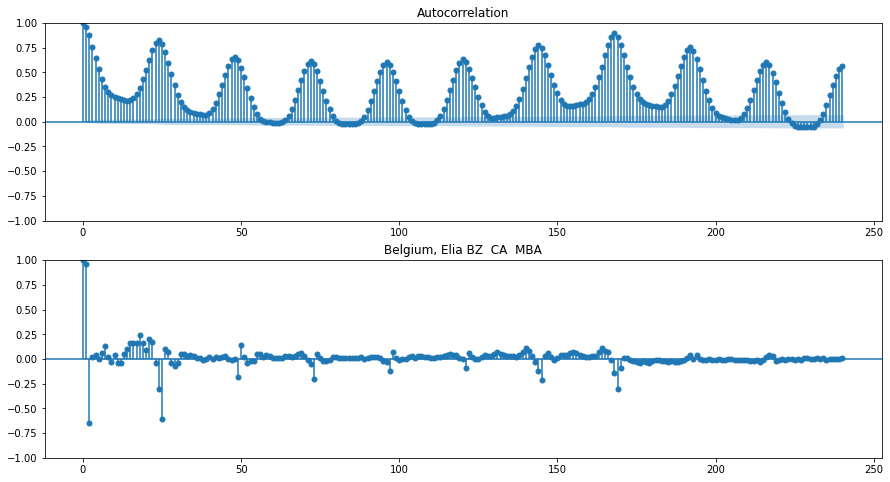

Loading dataset: Bulgaria, ESO BZ  CA  MBA


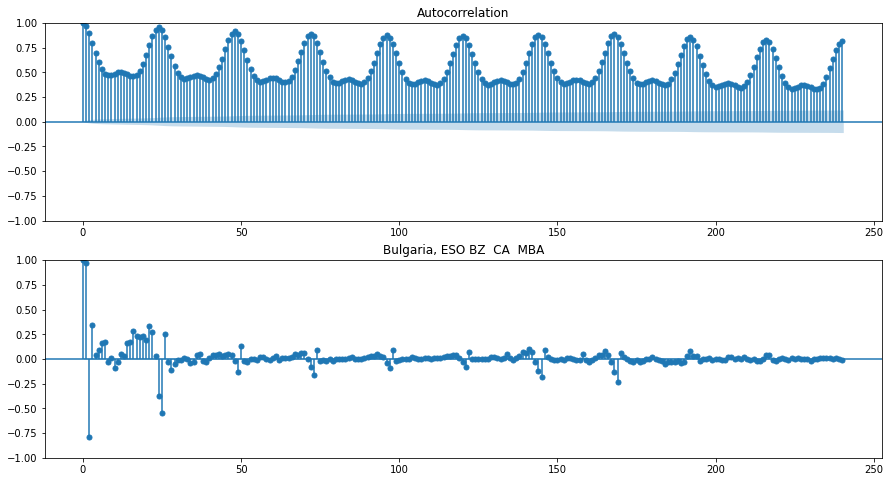

Loading dataset: Croatia, HOPS BZ  CA  MBA


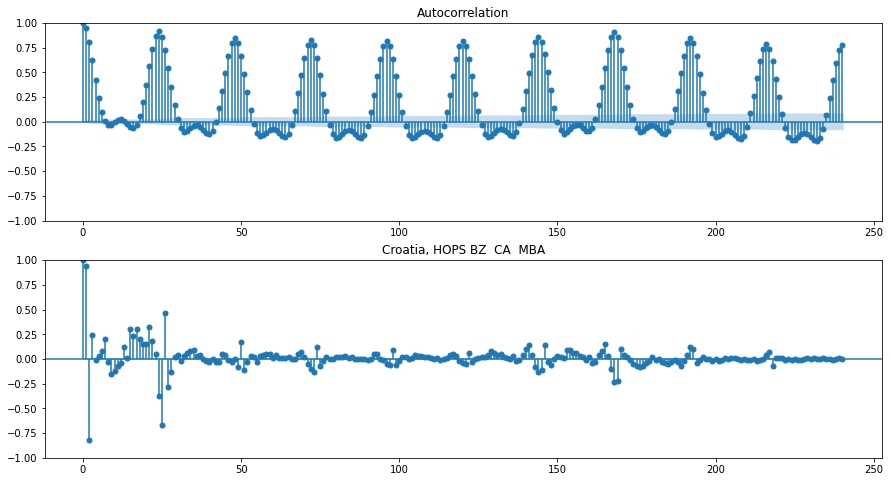

Loading dataset: Czech Republic, CEPS BZ  CA  MBA


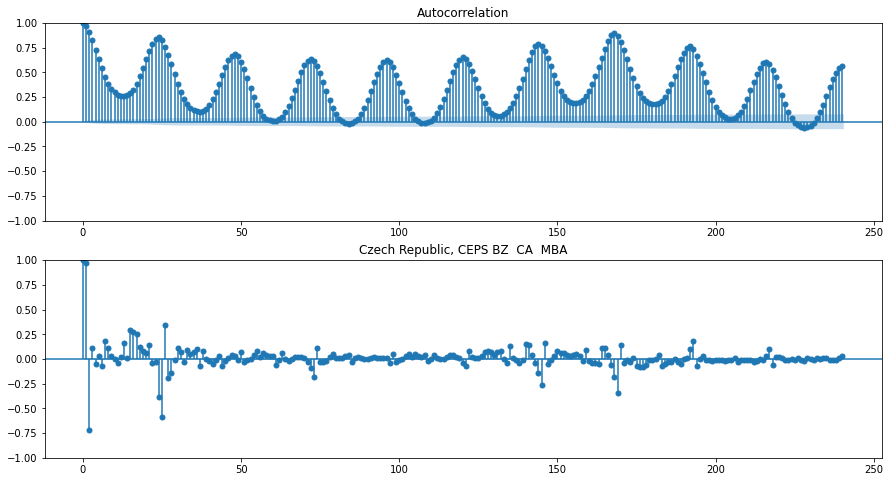

Loading dataset: DE-LU MBA


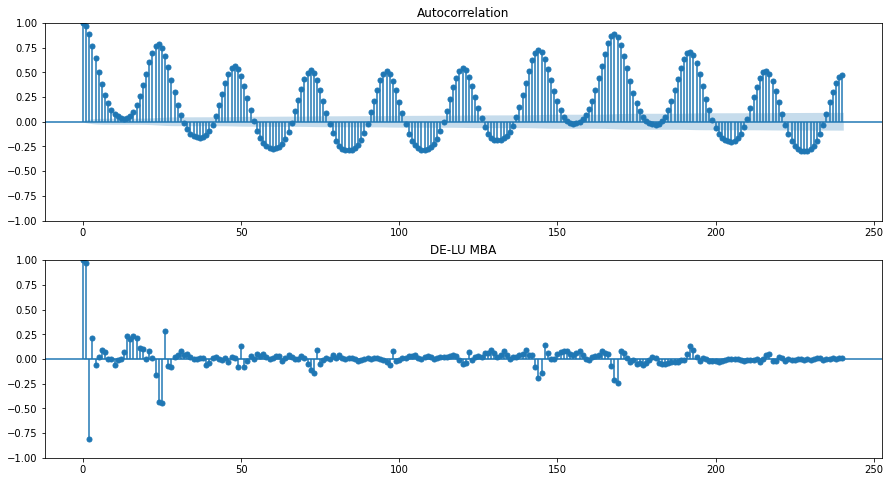

Loading dataset: DK1 BZ  MBA


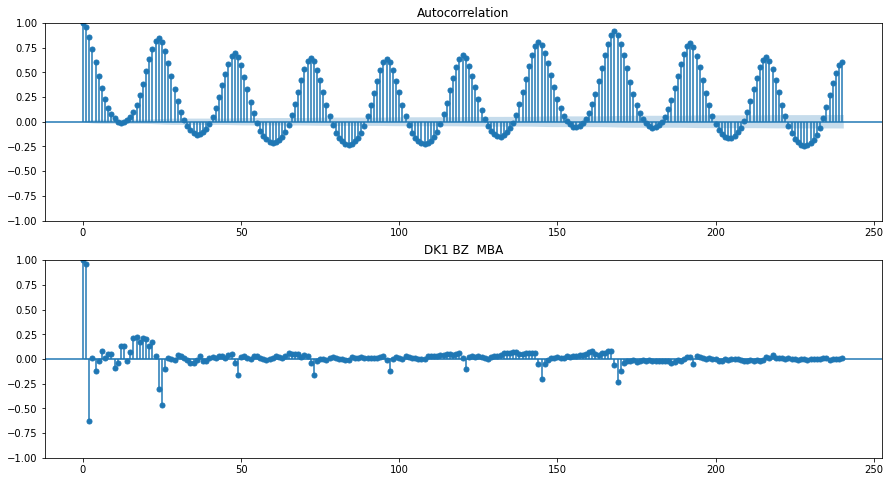

Loading dataset: DK2 BZ  MBA


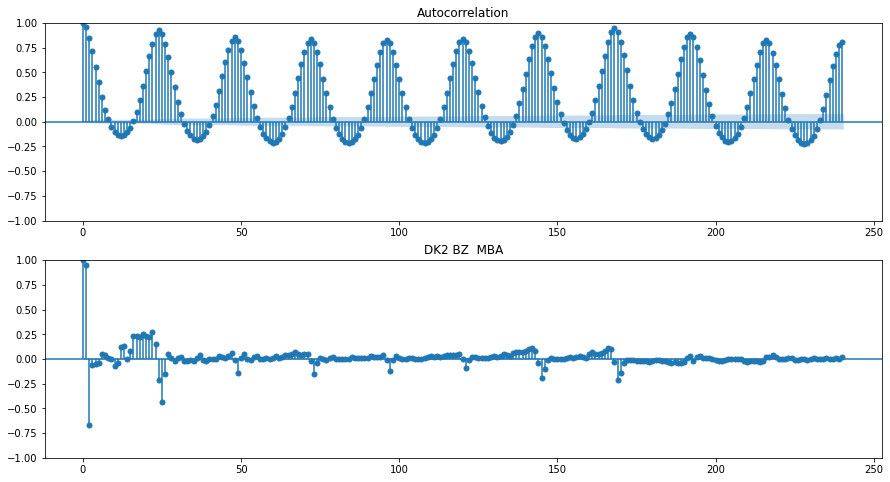

Loading dataset: Estonia, Elering BZ  CA  MBA


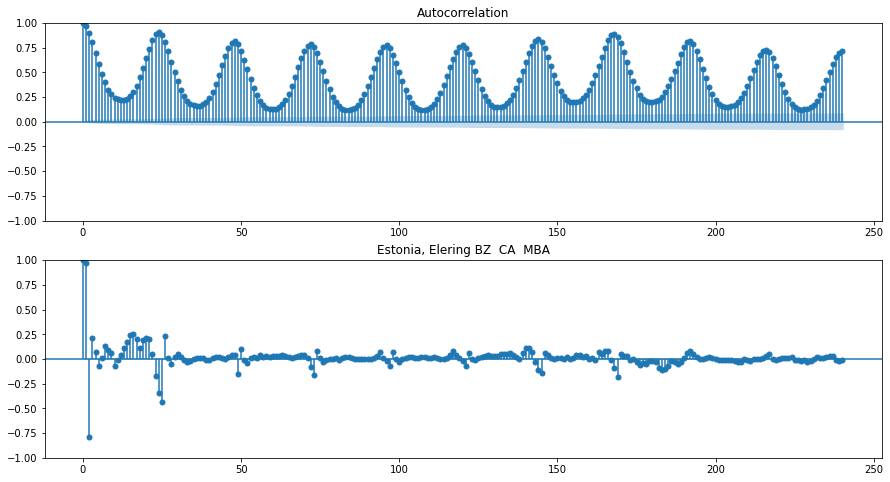

Loading dataset: Finland, Fingrid BZ  CA  MBA


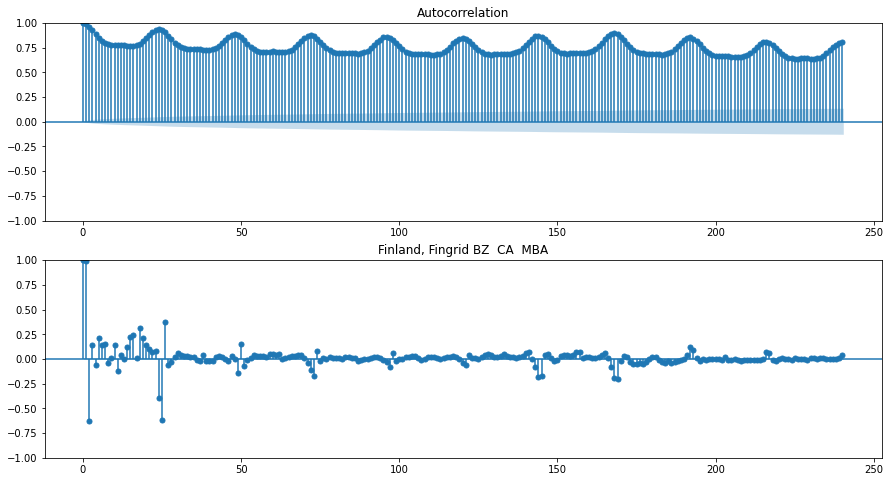

Loading dataset: France, RTE BZ  CA  MBA


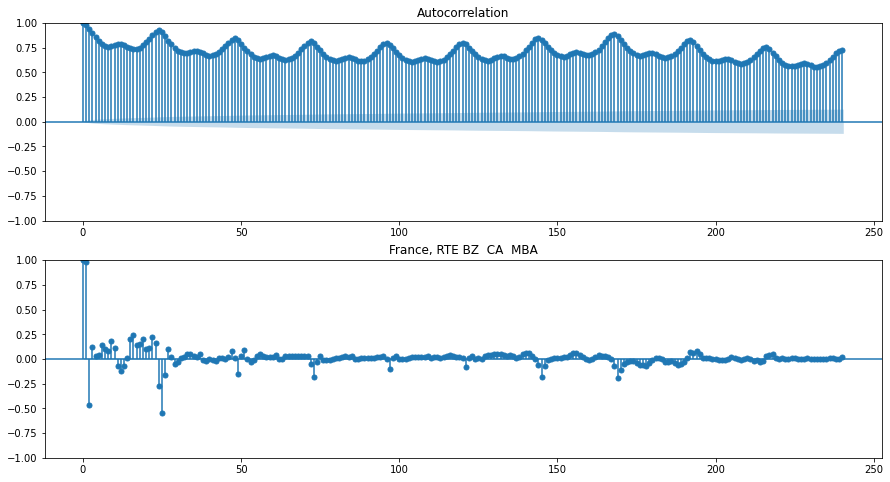

Loading dataset: Greece, IPTO BZ  CA MBA


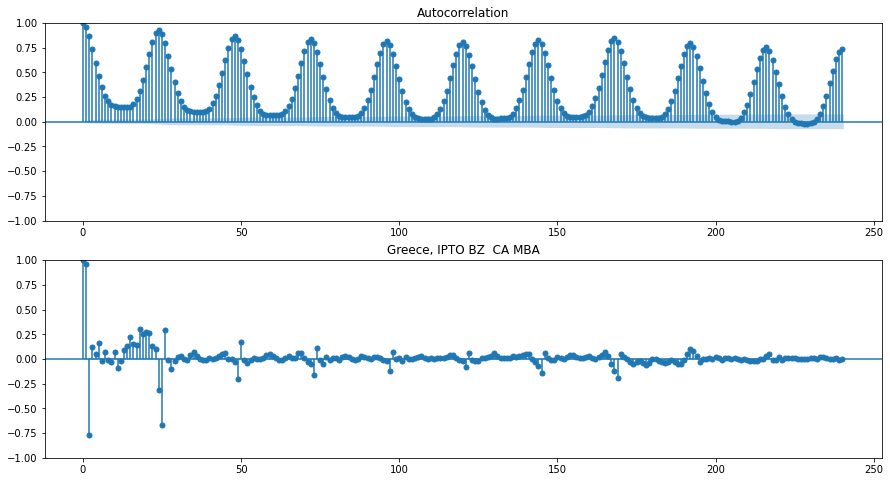

Loading dataset: Hungary, MAVIR CA  BZ  MBA


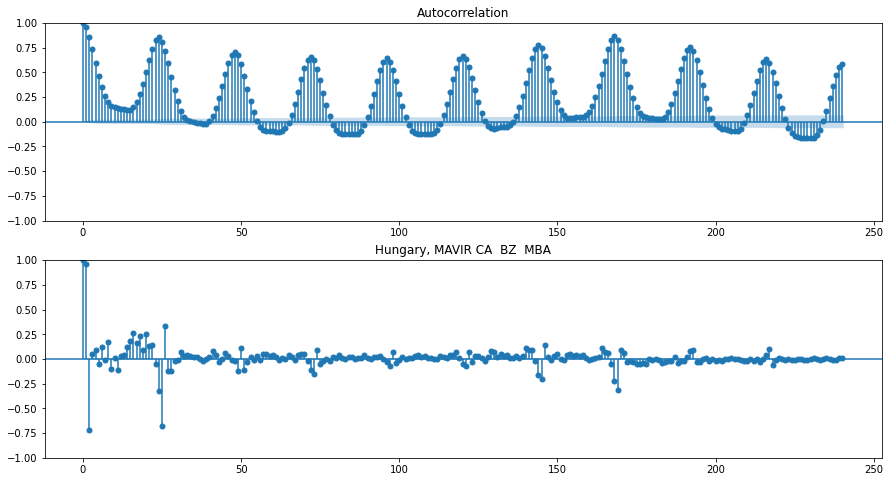

Loading dataset: Ireland (SEM) BZ  MBA


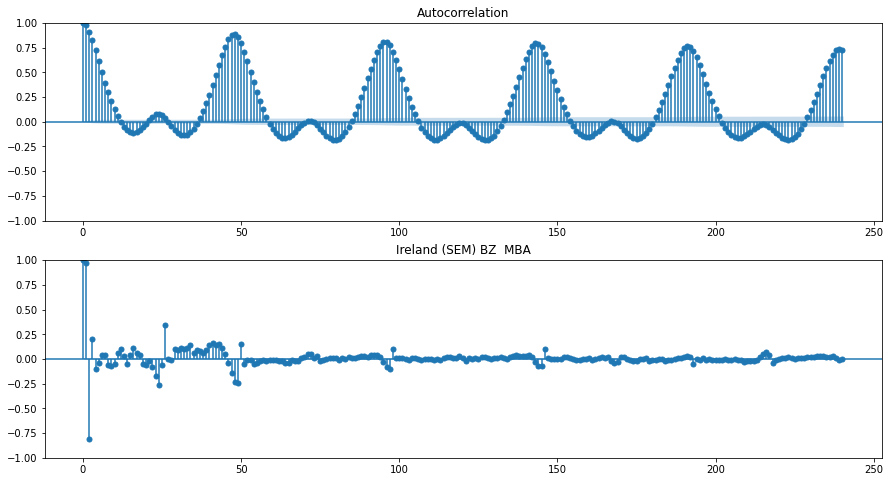

Loading dataset: IT-Centre-North BZ


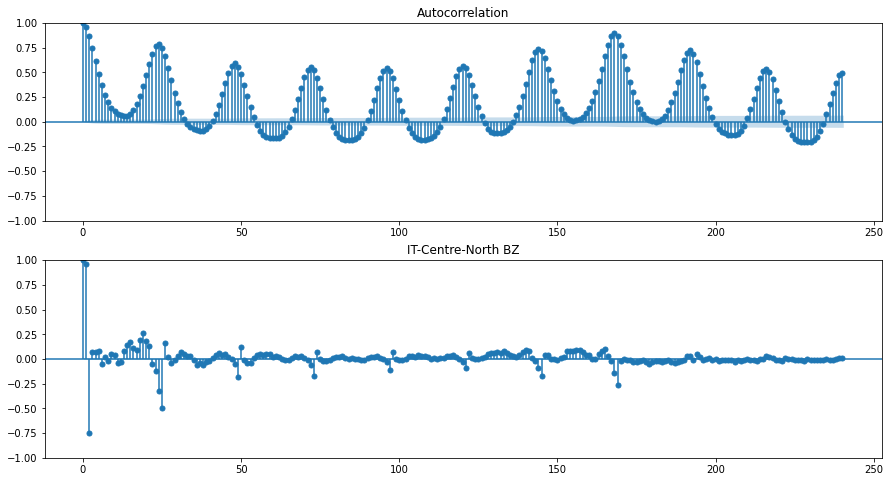

Loading dataset: IT-Centre-South BZ


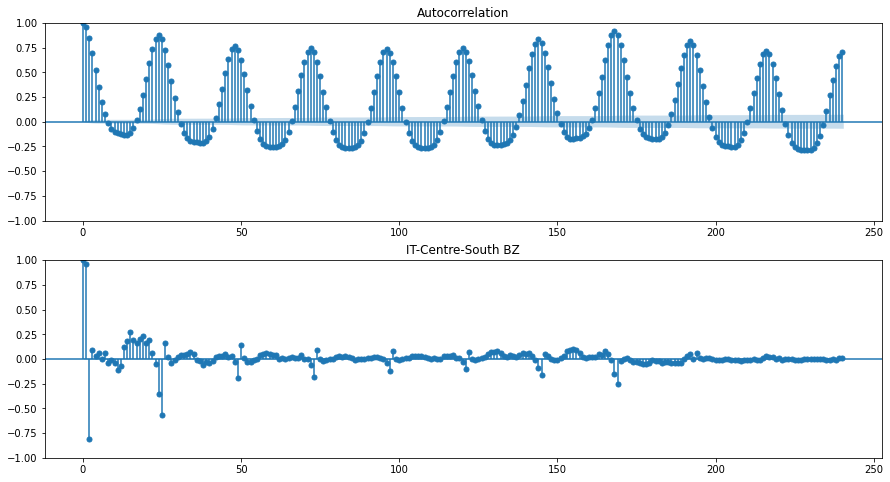

Loading dataset: IT-North BZ


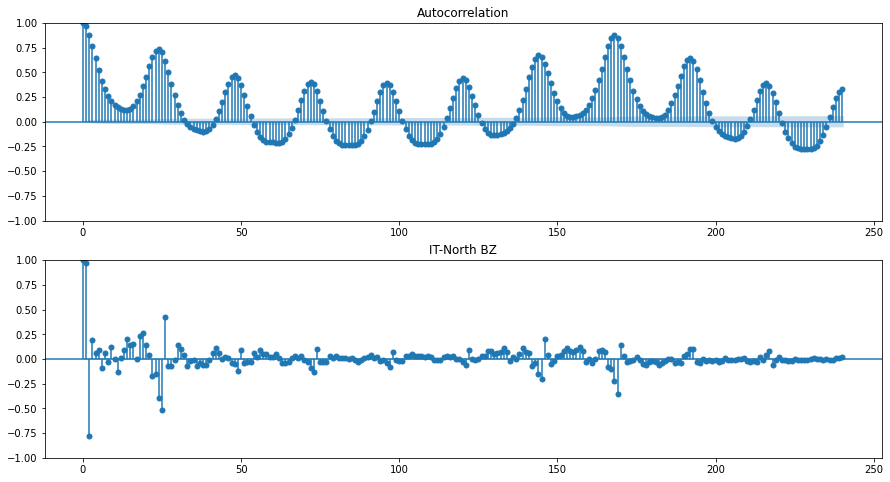

Loading dataset: IT-Sardinia BZ


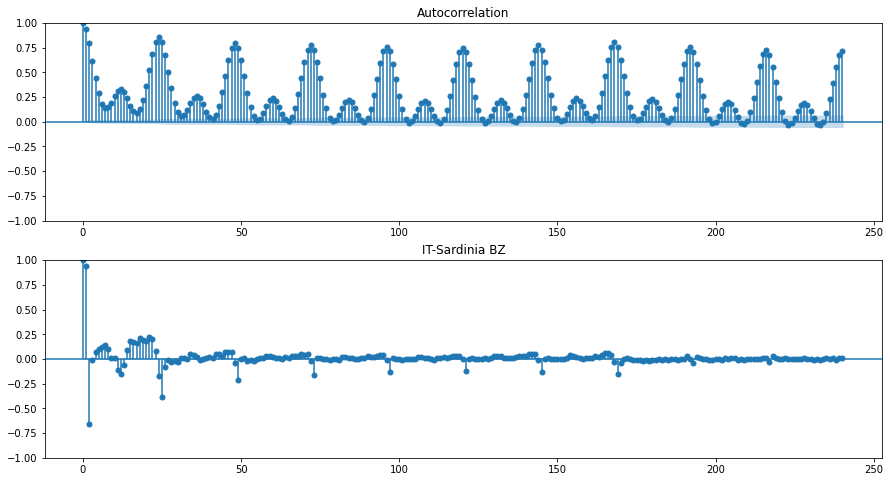

Loading dataset: IT-Sicily BZ


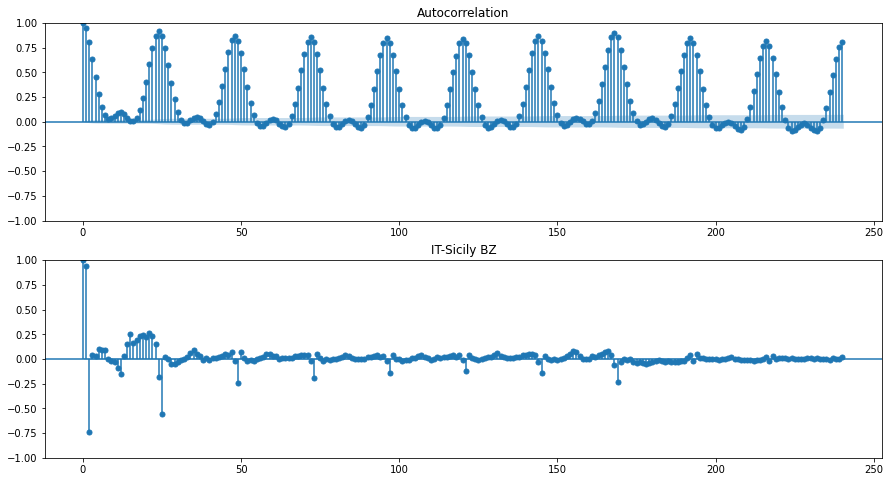

Loading dataset: IT-South BZ


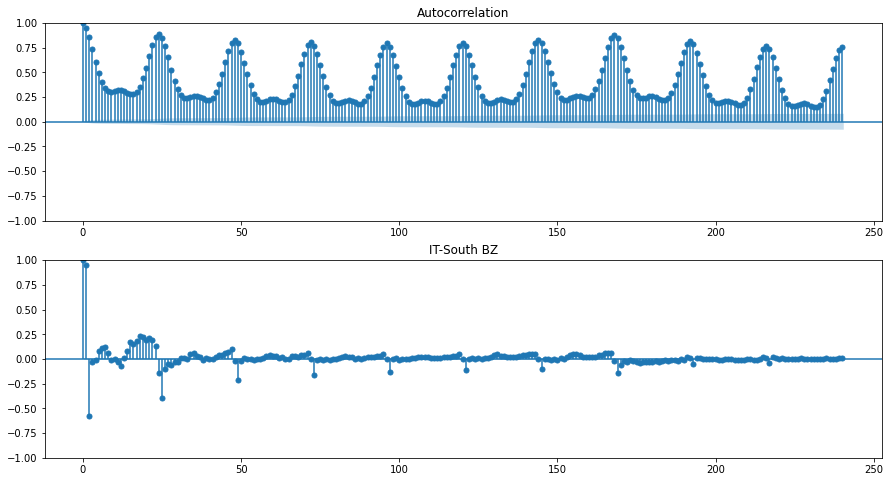

Loading dataset: Latvia, AST BZ  CA  MBA


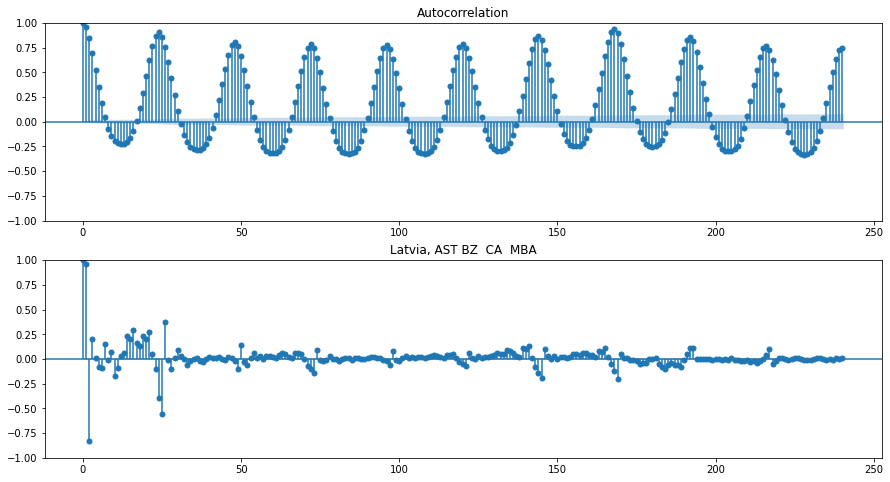

Loading dataset: Lithuania, Litgrid BZ  CA  MBA


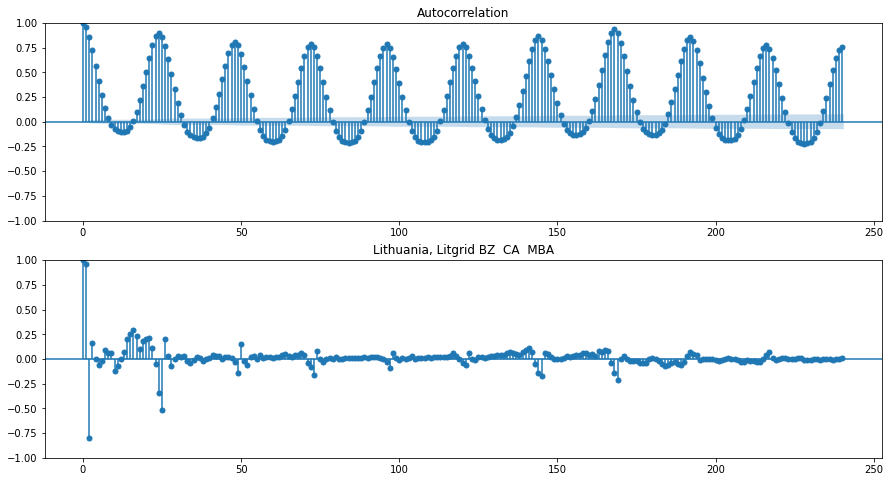

Loading dataset: Netherlands, TenneT NL BZ  CA MBA


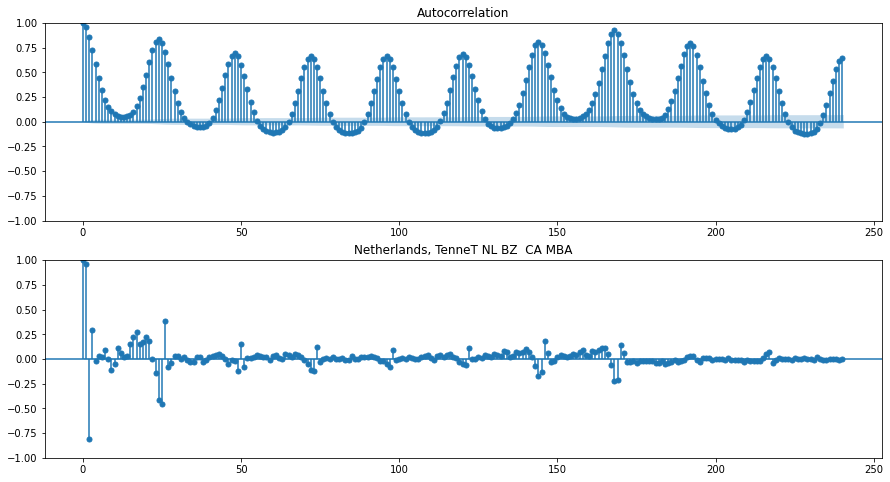

Loading dataset: NO1 BZ  MBA


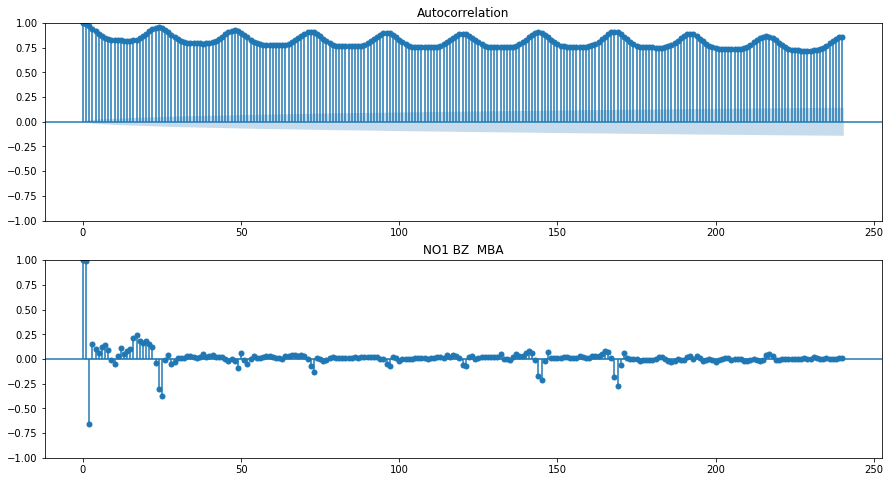

Loading dataset: NO2 BZ  MBA


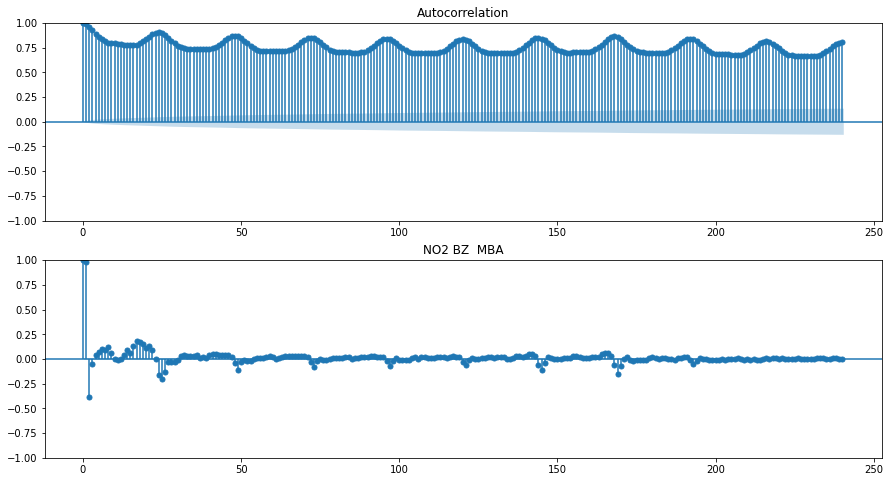

Loading dataset: NO3 BZ  MBA


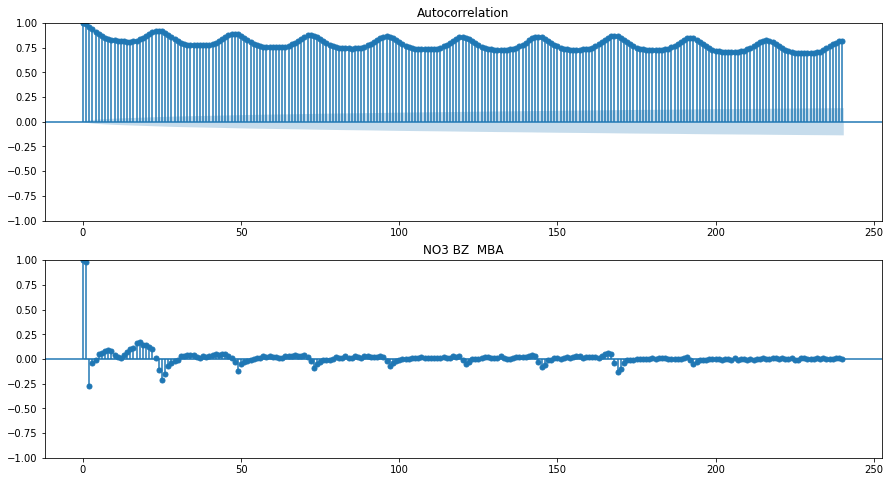

Loading dataset: NO4 BZ  MBA


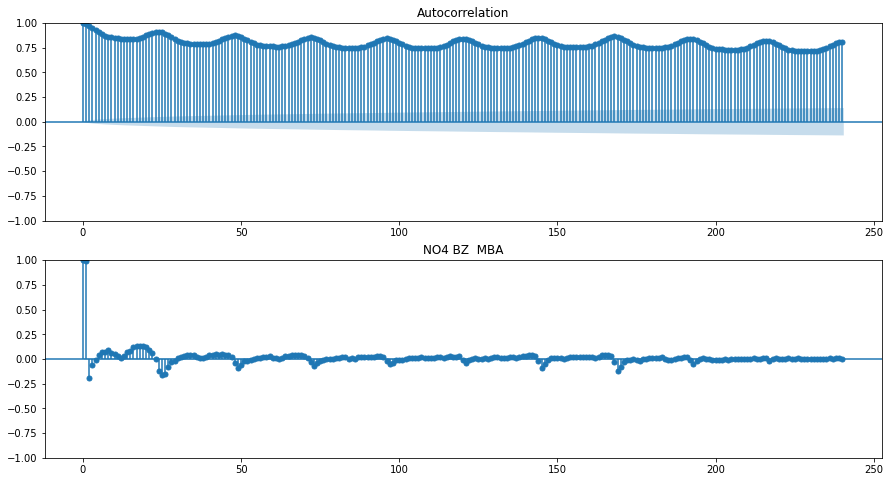

Loading dataset: NO5 BZ  MBA


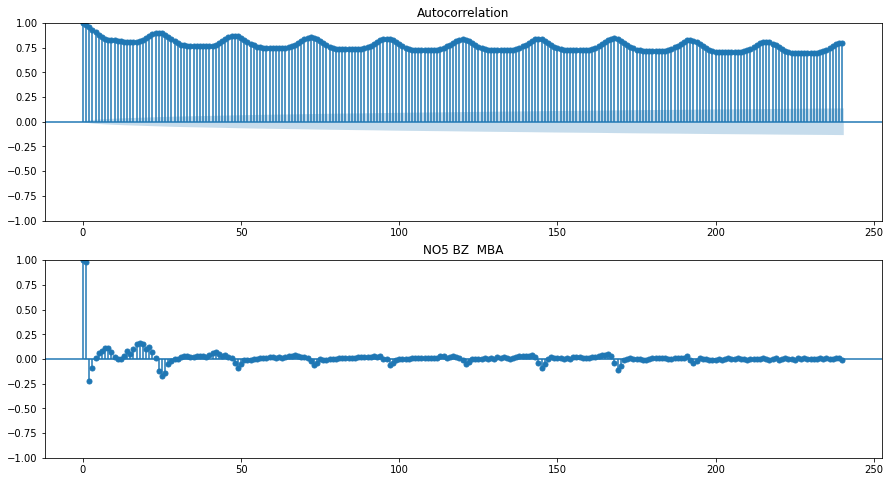

Loading dataset: Poland, PSE SA BZ  BZA  CA  MBA


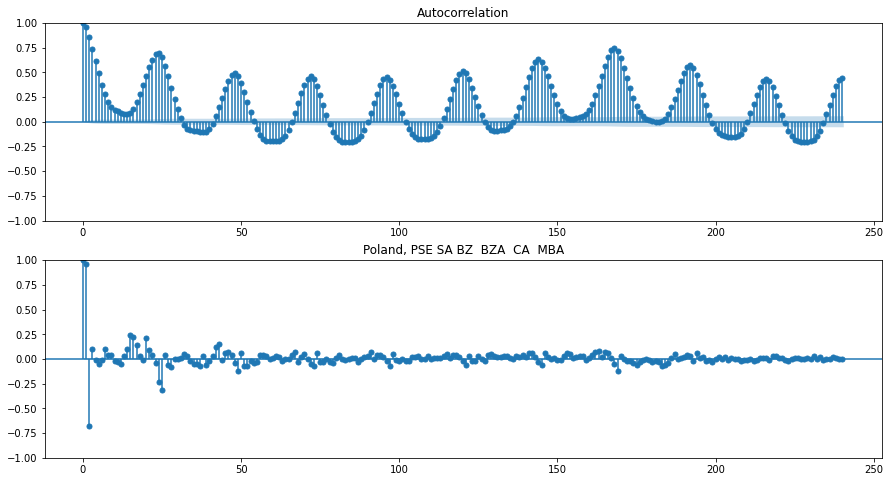

Loading dataset: Portugal, REN BZ  CA  MBA


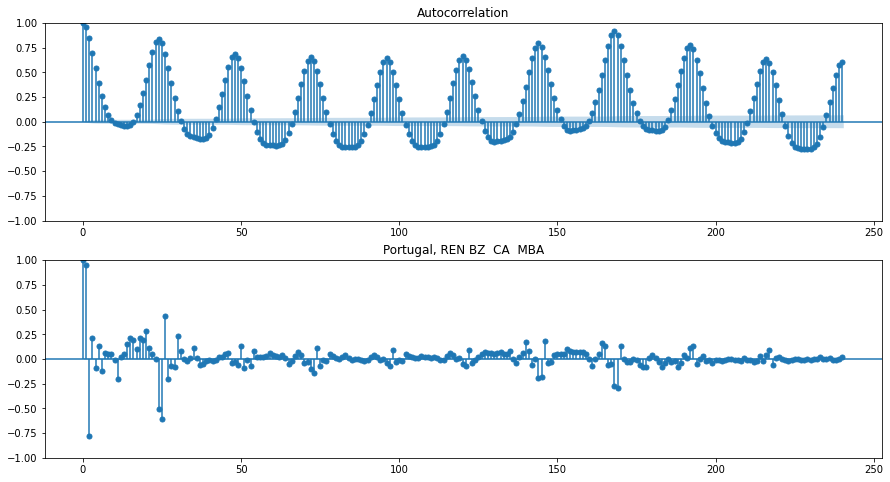

Loading dataset: Romania, Transelectrica BZ  CA  MBA


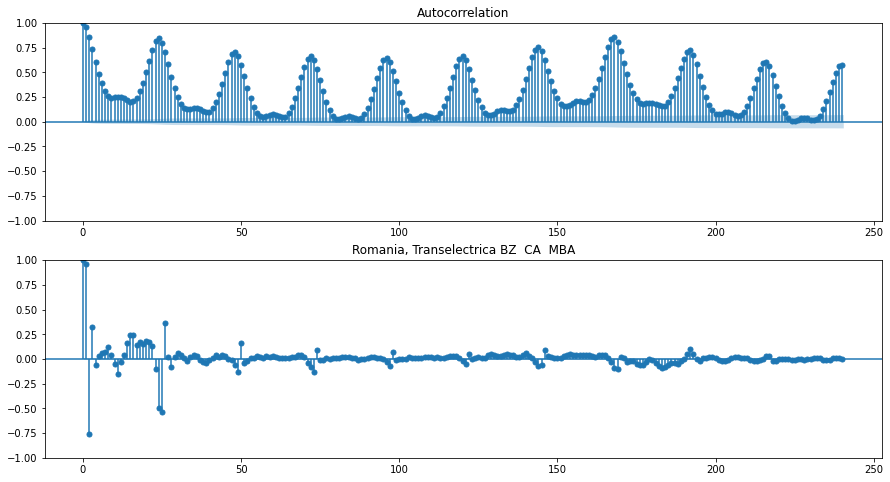

Loading dataset: SE1 BZ  MBA


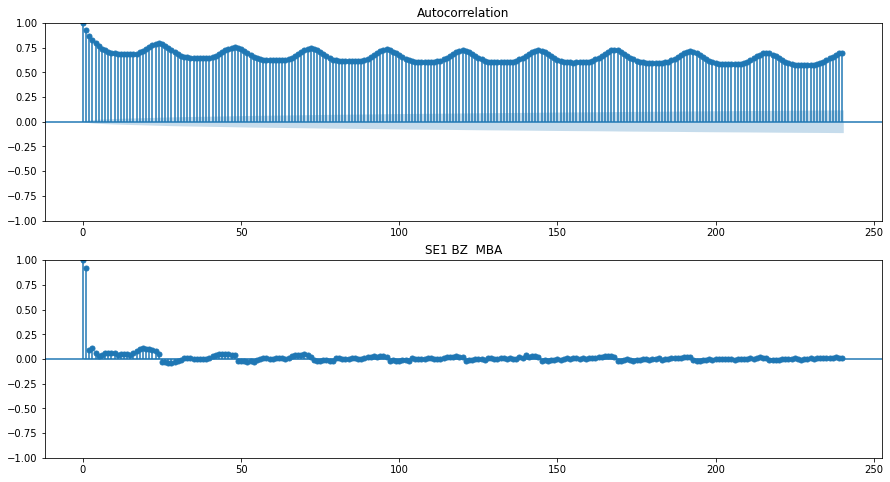

Loading dataset: SE2 BZ  MBA


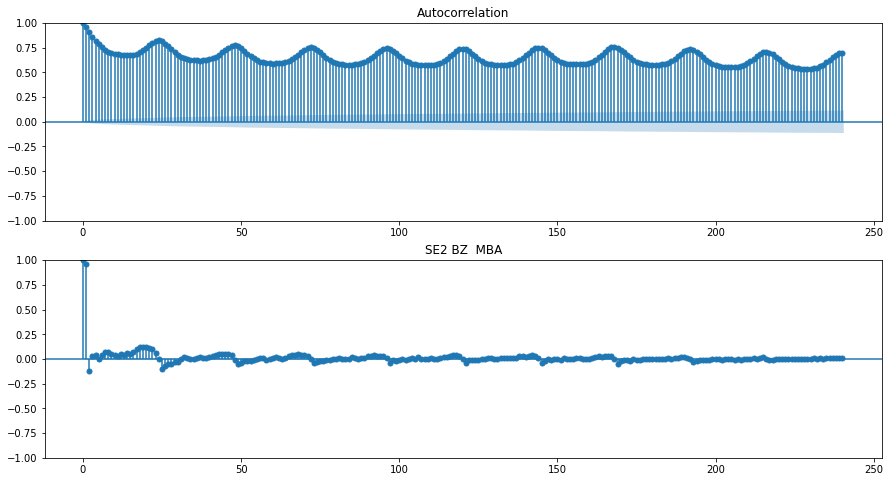

Loading dataset: SE3 BZ  MBA


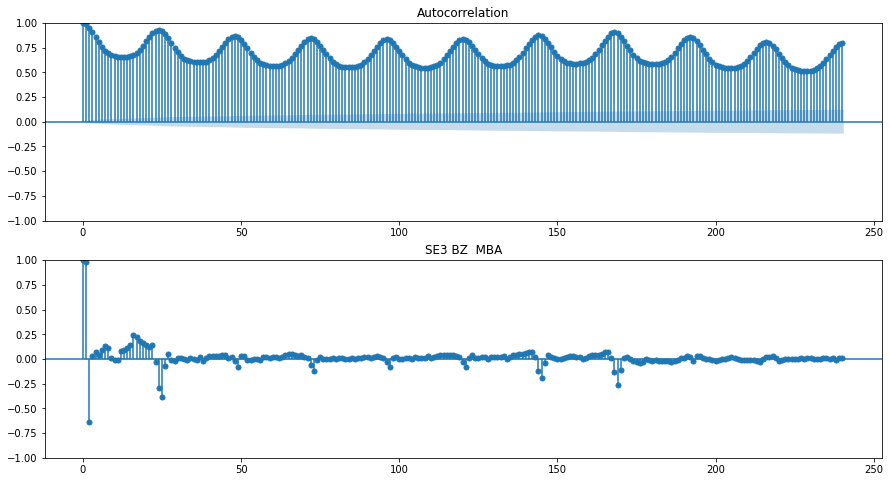

Loading dataset: SE4 BZ  MBA


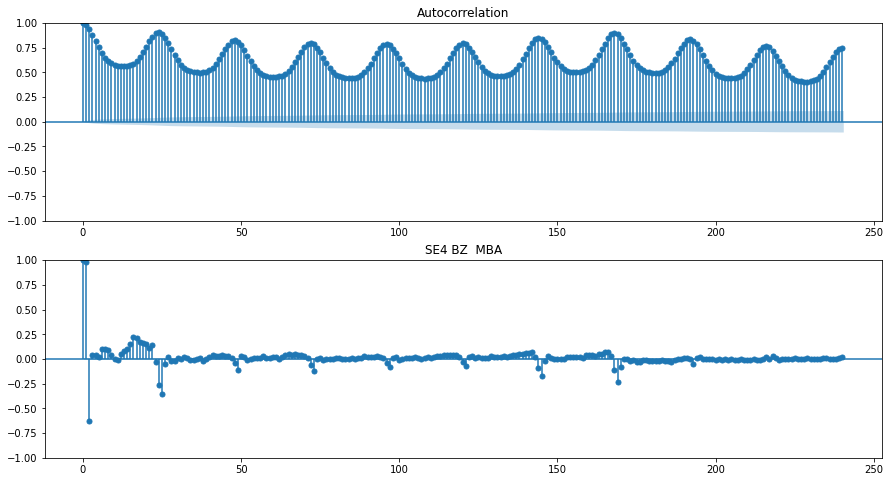

Loading dataset: Serbia, EMS BZ  CA  MBA


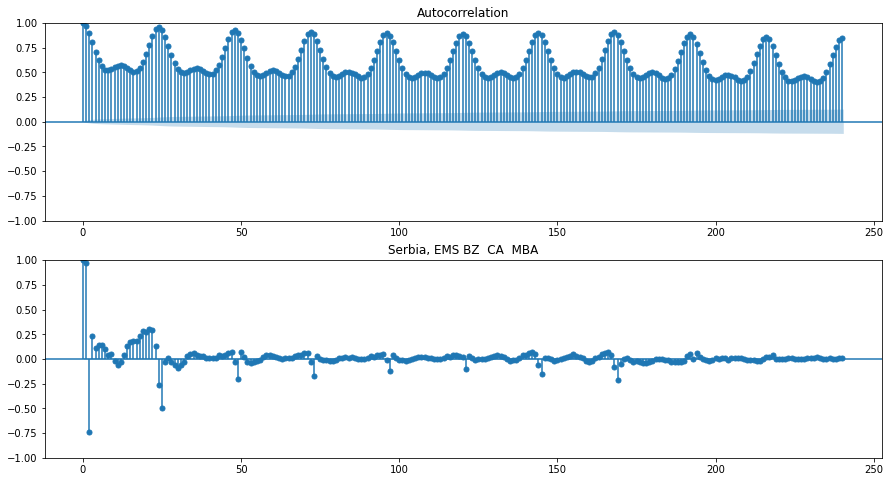

Loading dataset: Slovakia, SEPS BZ  CA  MBA


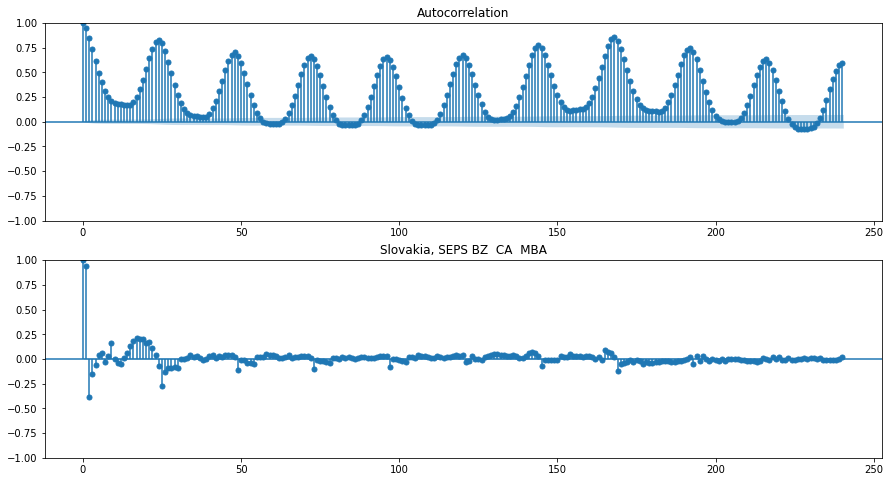

Loading dataset: Slovenia, ELES BZ  CA  MBA


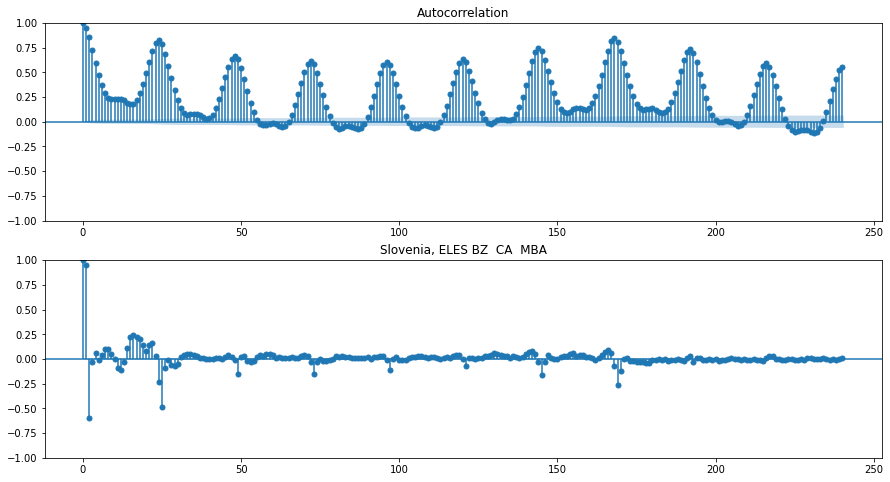

Loading dataset: Spain, REE BZ  CA  MBA


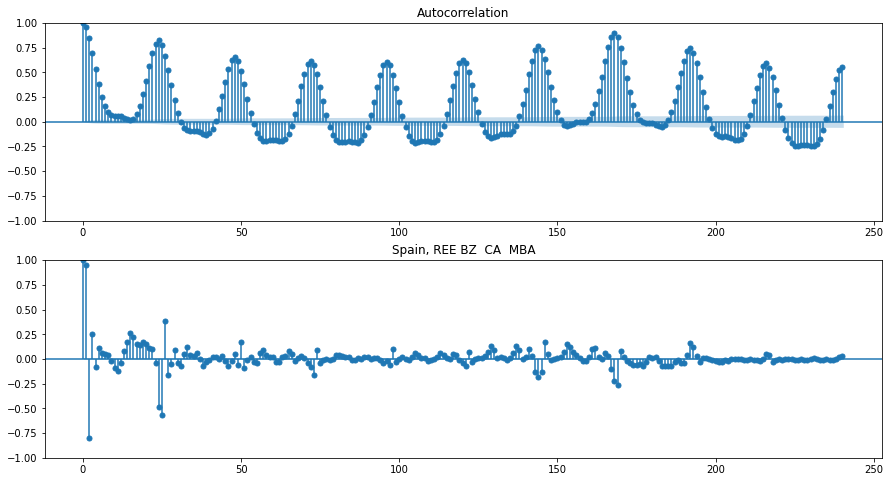

Loading dataset: Switzerland, Swissgrid BZ  CA  MBA


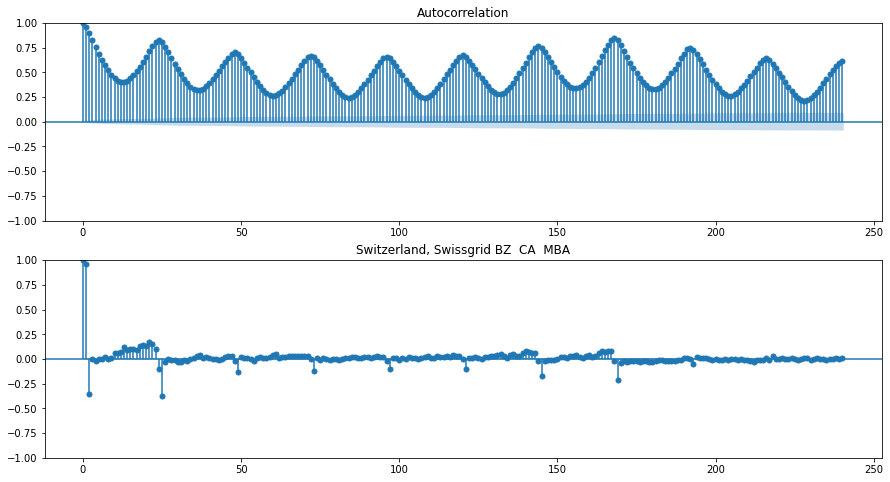

Loading dataset: Ukraine BEI CTA


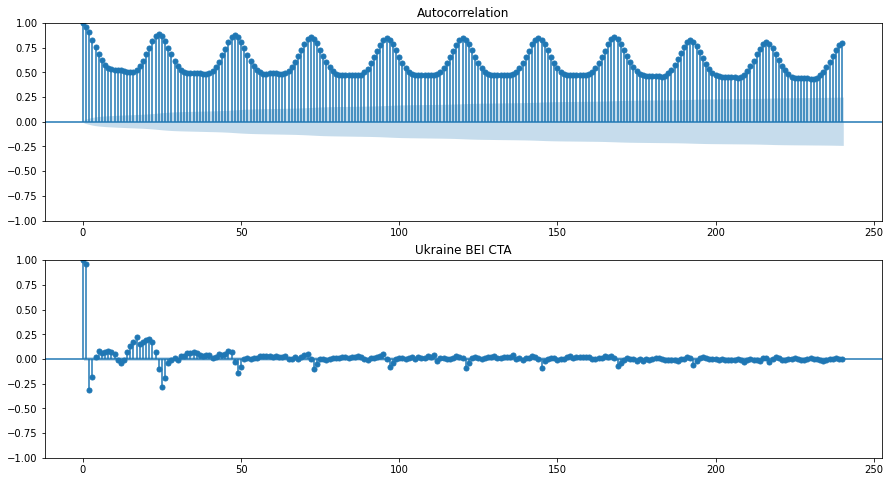

Loading dataset: Ukraine IPS CTA


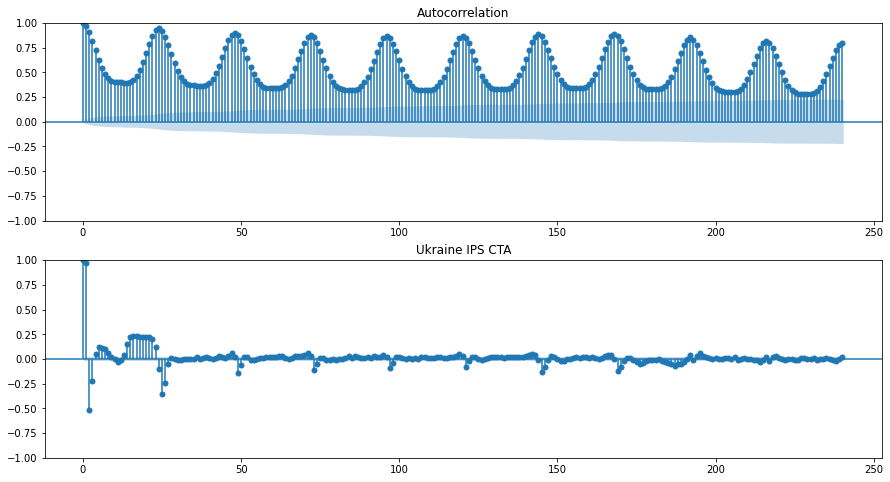

In [17]:
import statsmodels.api as sm

# cannot do it with the entire dataset, so i have to do it for each dataset individually
for csv in pathlib.Path('./Datasets/').glob('*.csv'):
    print("Loading dataset: "+csv.stem)
    temp_df = pd.read_csv(csv, index_col=0, parse_dates=['Start'], date_parser=dateparse)
    fig, ax = plt.subplots(2,1, figsize=(15, 8))
    fig = sm.graphics.tsa.plot_acf(temp_df['Load'], lags=24*10, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(temp_df['Load'], lags=24*10, ax=ax[1],method='ywm')
    plt.title(csv.stem)
    plt.show()

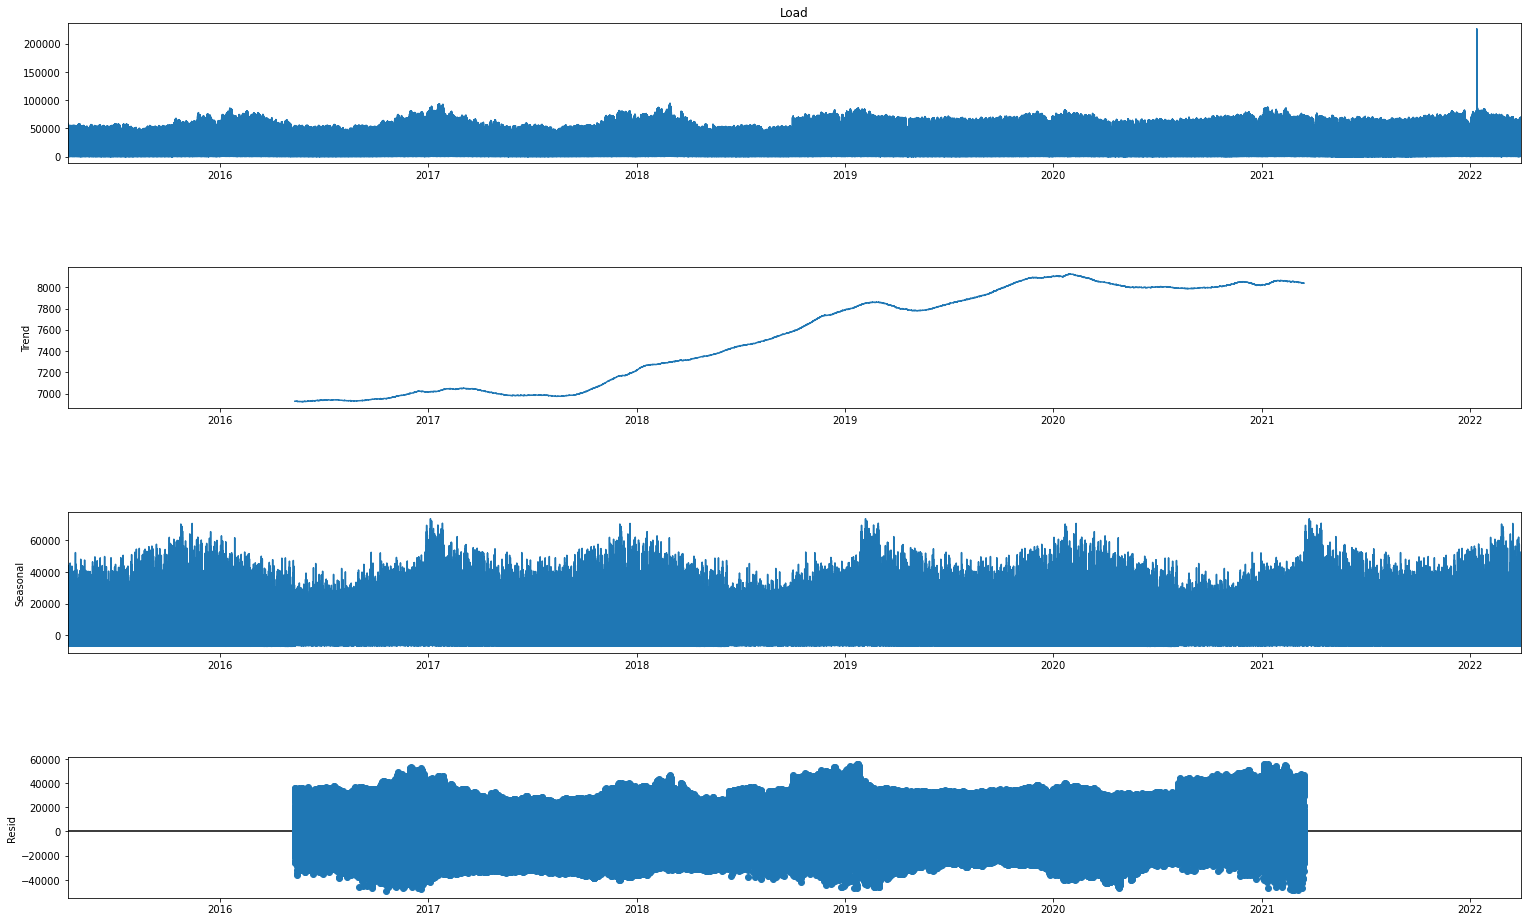

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

df_seasonal = df.set_index('Start') #set as index of dataset the datetime column

# 365 days + 48 half-hours of 41 out of 42 datasets (+ similar for the 1st dataset every 15 min)
result = seasonal_decompose(df_seasonal['Load'],  model='additive', period=365*48*41+365*48*2)

f = result.plot()
f.set_figheight(15)
f.set_figwidth(25)
plt.show()

Not much can be deduced other than the fact that there is indeed a seasonal and increasing trend along time axis 

<AxesSubplot:>

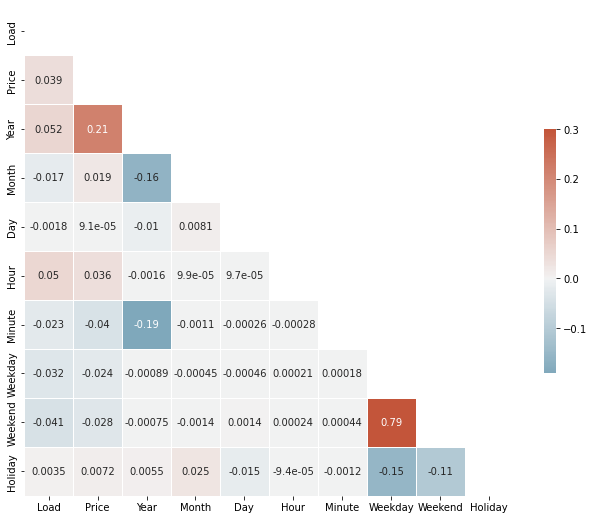

In [19]:
import numpy as np
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# When we run this cell the report process will be kicked off and 
# analyse all of your data within the dataframe

# https://towardsdatascience.com/pandas-profiling-easy-exploratory-data-analysis-in-python-65d6d0e23650
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
pivot_df = df.pivot_table('Load', ['Start'], 'Country')
# pivot_df.fillna(0, inplace=True)
# pivot_df.interpolate()
pivot_df.fillna(method="bfill", inplace=True)
pivot_df.fillna(method="ffill", inplace=True)
print('NaN left in pivot table?: '+str(pivot_df.isnull().values.any()))

NaN left in pivot table?: False


In [64]:
pivot_df.head()

Country                    Austria  Belgium  Bulgaria  Croatia  Czechia  \
Start                                                                     
2015-04-09 23:00:00+00:00   6401.0  10797.0    4006.0   1807.0   6828.0   
2015-04-09 23:15:00+00:00   6224.0  10141.0    4006.0   1807.0   6569.0   
2015-04-09 23:30:00+00:00   6187.0  10141.0    4006.0   1807.0   6569.0   
2015-04-09 23:45:00+00:00   6034.0  10141.0    4006.0   1807.0   6569.0   
2015-04-10 00:00:00+00:00   5975.0  10141.0    4006.0   1807.0   6569.0   

Country                    Denmark  Estonia  Finland   France  Germany  ...  \
Start                                                                   ...   
2015-04-09 23:00:00+00:00   1612.5    787.0   8978.0  54326.0  42359.0  ...   
2015-04-09 23:15:00+00:00   1488.5    754.0   8635.0  51467.0  42359.0  ...   
2015-04-09 23:30:00+00:00   1488.5    754.0   8635.0  51467.0  42359.0  ...   
2015-04-09 23:45:00+00:00   1488.5    754.0   8635.0  51467.0  42359.0  ...   
2015-04-10 00:00:00+00:00   1488.5    754.0   8635.0  51467.0  42359.0  ...   

Country                     Poland  Portugal  Romania  Serbia  Slovakia  \
Start                                                                     
2015-04-09 23:00:00+00:00  16180.0    5802.0   6513.0  6344.0    3081.0   
2015-04-09 23:15:00+00:00  16180.0    5248.0   6214.0  6344.0    2964.0   
2015-04-09 23:30:00+00:00  16180.0    5248.0   6214.0  6344.0    2964.0   
2015-04-09 23:45:00+00:00  16180.0    5248.0   6214.0  6344.0    2964.0   
2015-04-10 00:00:00+00:00  16180.0    5248.0   6214.0  6344.0    2964.0   

Country                    Slovenia    Spain   Sweden  Switzerland  Ukraine  
Start                                                                        
2015-04-09 23:00:00+00:00    1296.0  27602.0  3747.00       6865.0   6839.0  
2015-04-09 23:15:00+00:00    1190.0  25497.0  3497.75       6362.0   6839.0  
2015-04-09 23:30:00+00:00    1190.0  25497.0  3497.75       6362.0   6839.0  
2015-04-09 23:45:00+00:00    1190.0  25497.0  3497.75       6362.0   6839.0  
2015-04-10 00:00:00+00:00    1190.0  25497.0  3497.75       6362.0   6839.0  

[5 rows x 28 columns]

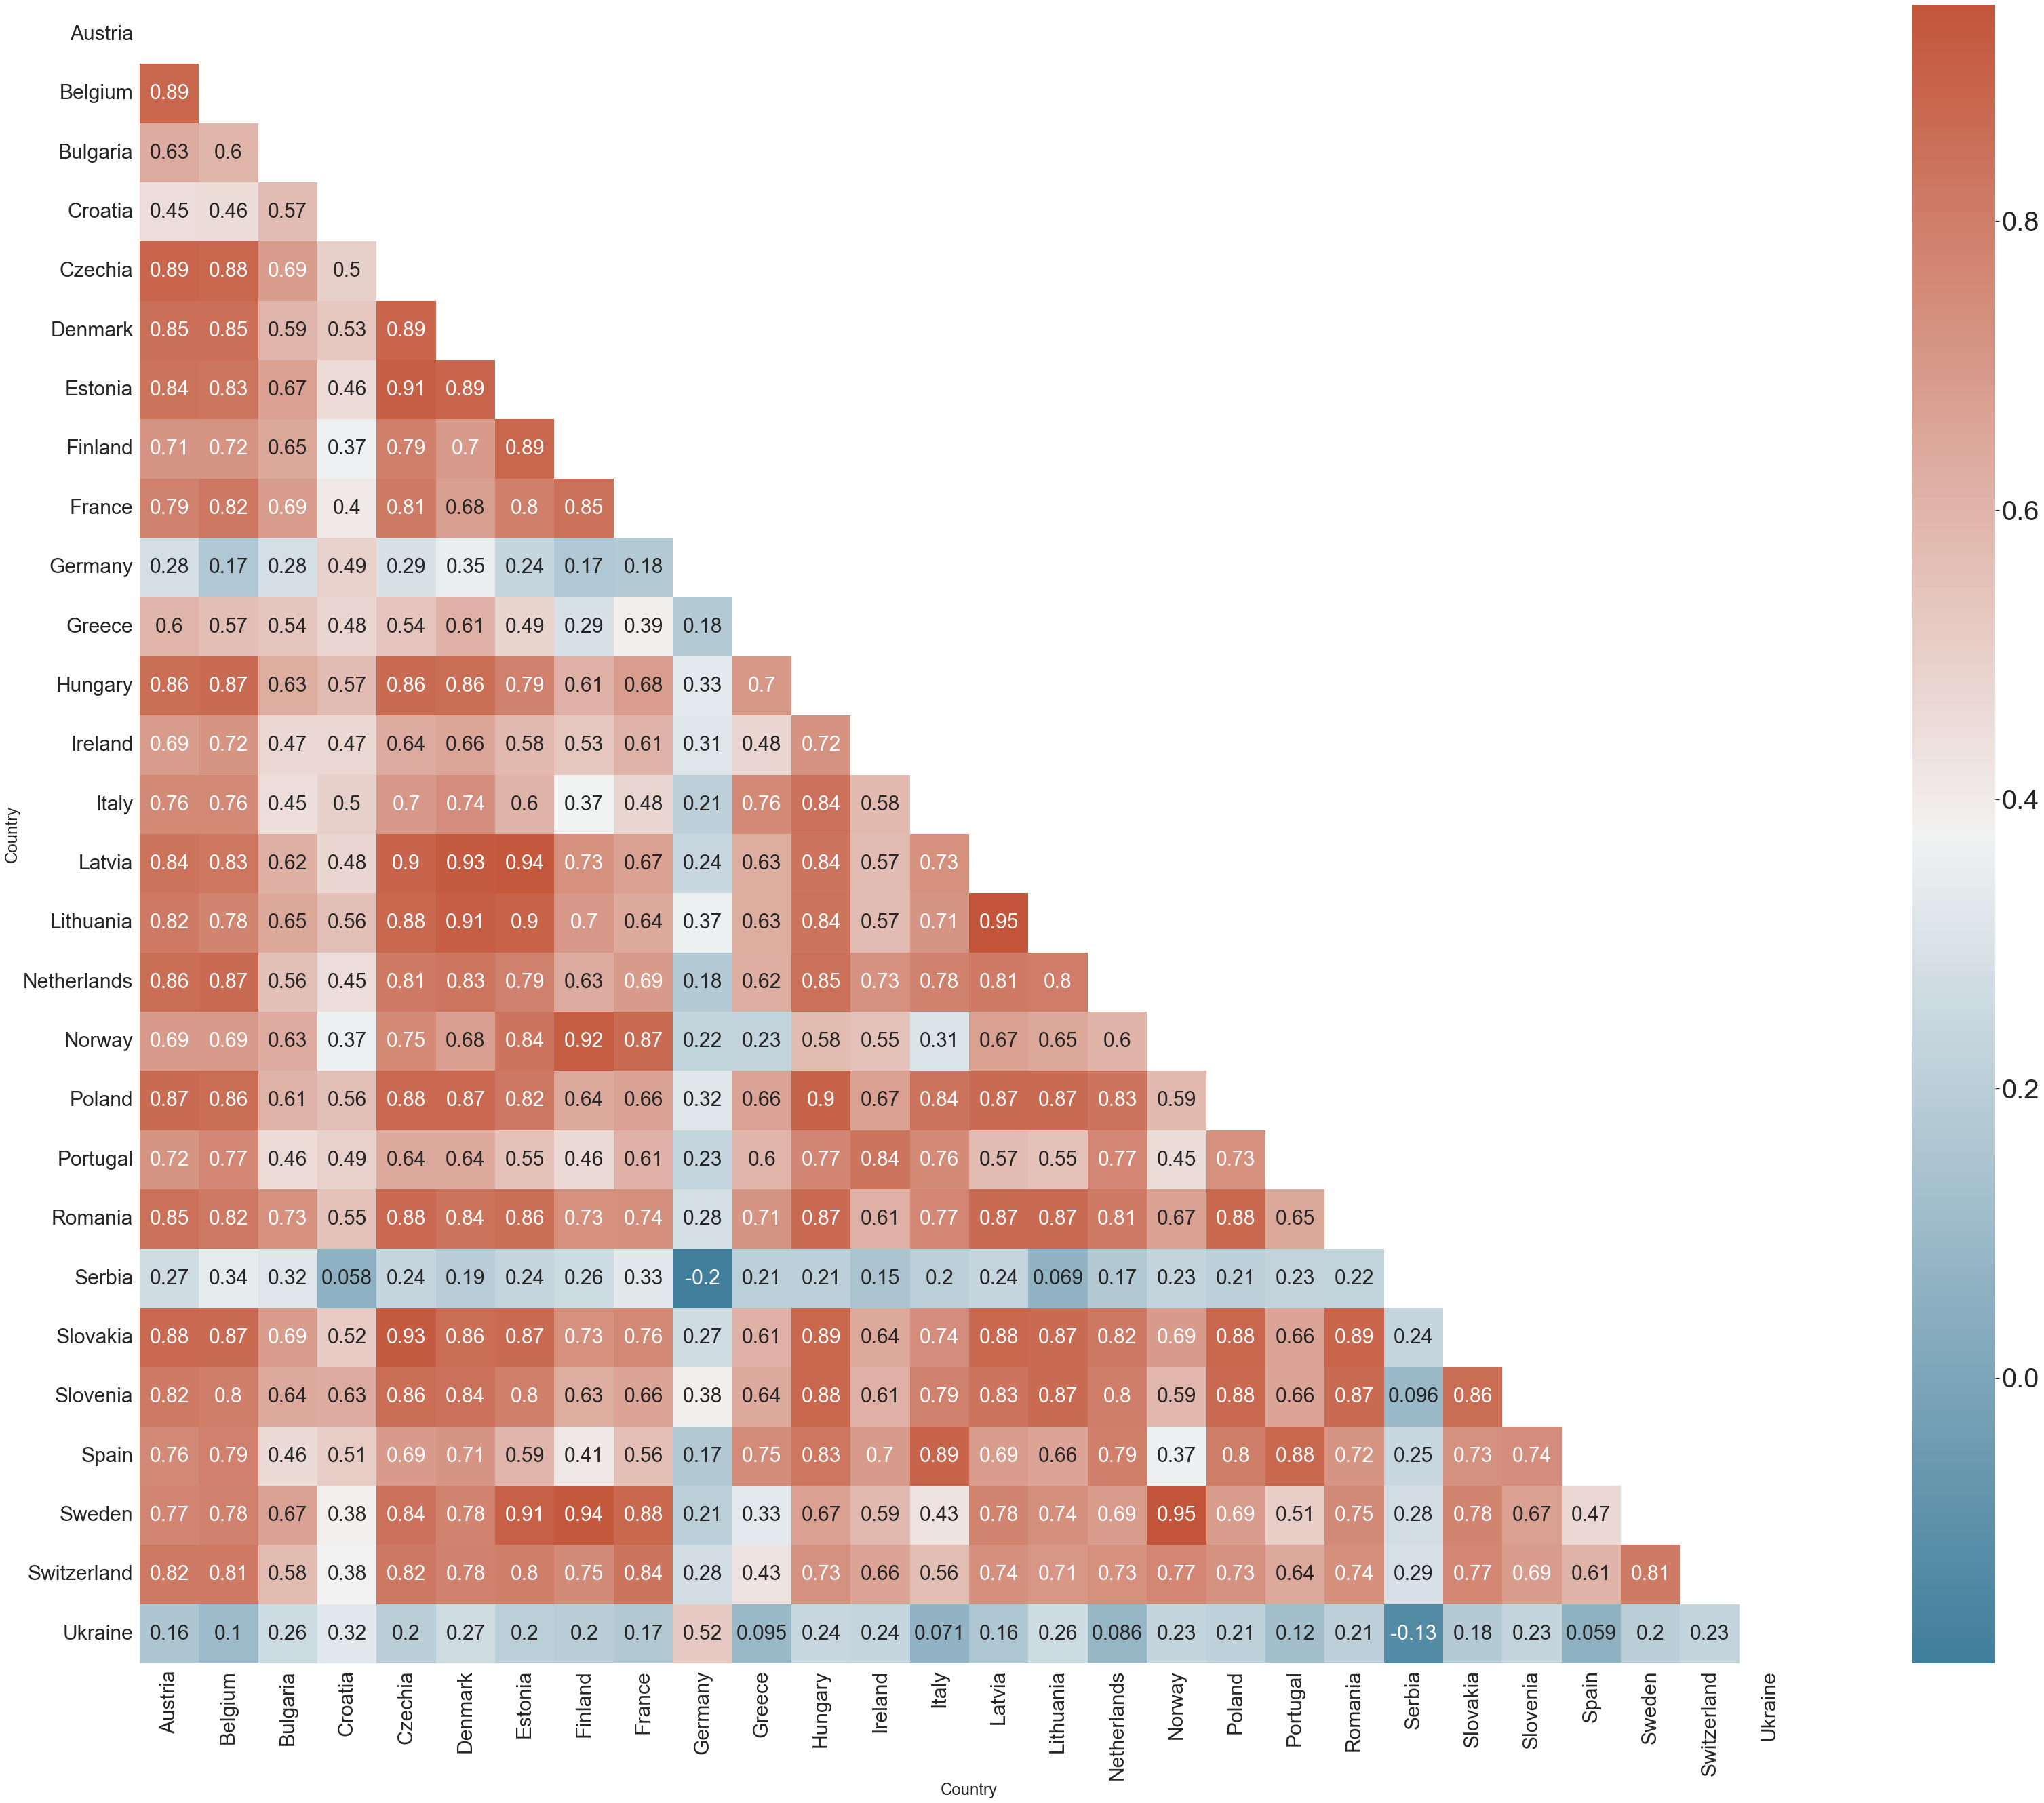

In [75]:
import numpy as np

# Compute the correlation matrix
corr = pivot_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 45))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap.set_bad('w') # default value is 'k'

# Draw the heatmap with the mask and correct aspect ratio
res = sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, 
                  annot_kws={"size": 30}, ax=ax)

# size of country names
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 30)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 30); # ";" to supress print in cell

# change font size of heatmap colourbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=40)


In [23]:
pivot_report = ProfileReport(pivot_df
                             #, minimal=True
                            )
pivot_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]